In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium 


In [2]:
bike_data_hourly = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Hourly_Weather.csv')

In [3]:
bike_data_daily = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Daily_Weather.csv')

In [4]:
bike_data_hourly.head()

Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0    20.0  2021-01-01     0    26.0         46.0                       90   
1    23.0  2021-01-01     1    23.0         46.0                       88   
2    20.0  2021-01-01     2    28.0         48.0                       87   
3     9.0  2021-01-01     3     7.0         16.0                       81   
4     7.0  2021-01-01     4     5.0         12.0                       77   

   temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  
0                  2.4                       1                  10.2  
1                  1.8                       1                  10.0  
2                  1.1                       2                  10.1  
3                  1.6                       2                  10.6  
4                  1.6                       2                   9.9

In [5]:
def humidity_category(humidity):
    if humidity <= 30:
        return 'Very Dry'
    elif 31 <= humidity <= 50:
        return 'Dry'
    elif 51 <= humidity <= 70:
        return 'Moderate'
    elif 71 <= humidity <= 85:
        return 'Humid'
    else:  # humidity > 85
        return 'Very Humid'

bike_data_hourly['humidity_catogorised'] = bike_data_hourly['relativehumidity_2m (%)'].apply(humidity_category)

In [6]:
def temperature_category(temp):
    if temp >= 30:
        return 'Hot'
    elif 20 <= temp < 30:
        return 'Warm'
    elif 10 <= temp < 20:
        return 'Temperate'
    elif 0 <= temp < 10:
        return 'Cool'
    elif -10 <= temp < 0:
        return 'Cold'
    else:  # temp < -10
        return 'Freezing'

bike_data_hourly['temp_catogorised'] = bike_data_hourly['temperature_2m (°C)'].apply(temperature_category)

In [7]:
bike_data_hourly['weathercode (wmo code)'].unique()

array([ 1,  2,  3, 51, 53, 61, 63,  0, 71, 73, 55, 75, 65])

In [8]:
weather = {
0:	'Clear sky',
1:	'Mainly clear',
2:	'Partly cloudy',
3:	'Overcast',
51:	'Light drizzle',
53:	'Moderate drizzle',
55:	'Dense drizzle',
61:	'Slight rain',
63:	'Moderate rain',
65:	'Heavy rain',
71:	'Slight snow fall',
73:	'Moderate snow fall',
75:	'Heavy snow fall'
}

bike_data_hourly['weather_catagorised'] = bike_data_hourly['weathercode (wmo code)'].map(weather)

In [9]:
def wind_feel(speed):
    if speed <= 5:
        return 'Calm'
    elif 6 <= speed <= 28:
        return 'Light to Moderate Breeze'
    elif 29 <= speed <= 61:
        return 'Fresh to Strong Breeze'
    elif 62 <= speed <= 88:
        return 'High Wind to Gale'
    else:  # speed > 88
        return 'Severe Gale to Hurricane'

bike_data_hourly['wind_catagorised'] = bike_data_hourly['windspeed_10m (km/h)'].apply(wind_feel)

In [10]:
bike_data_hourly['Date'] = pd.to_datetime(bike_data_hourly['Date'])

In [11]:
bike_data_hourly.head()

Casual       Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0    20.0 2021-01-01     0    26.0         46.0                       90   
1    23.0 2021-01-01     1    23.0         46.0                       88   
2    20.0 2021-01-01     2    28.0         48.0                       87   
3     9.0 2021-01-01     3     7.0         16.0                       81   
4     7.0 2021-01-01     4     5.0         12.0                       77   

   temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  \
0                  2.4                       1                  10.2   
1                  1.8                       1                  10.0   
2                  1.1                       2                  10.1   
3                  1.6                       2                  10.6   
4                  1.6                       2                   9.9   

  humidity_catogorised temp_catogorised weather_catagorised  \
0           Very Humid             Cool        Mainly clear   
1           Very Humid             Cool        Mainly clear   
2           Very Humid             Cool       Partly cloudy   
3                Humid             Cool       Partly cloudy   
4                Humid             Cool       Partly cloudy   

           wind_catagorised  
0  Light to Moderate Breeze  
1  Light to Moderate Breeze  
2  Light to Moderate Breeze  
3  Light to Moderate Breeze  
4  Light to Moderate Breeze

In [12]:
bike_data_hourly.dtypes

Casual                            float64
Date                       datetime64[ns]
Hour                                int64
Member                            float64
Total_rides                       float64
relativehumidity_2m (%)             int64
temperature_2m (°C)               float64
weathercode (wmo code)              int64
windspeed_10m (km/h)              float64
humidity_catogorised               object
temp_catogorised                   object
weather_catagorised                object
wind_catagorised                   object
dtype: object

[Text(0.5, 0, 'Casual'),
 Text(1.5, 0, 'Date'),
 Text(2.5, 0, 'Hour'),
 Text(3.5, 0, 'Member'),
 Text(4.5, 0, 'Total_rides'),
 Text(5.5, 0, 'relativehumidity_2m (%)'),
 Text(6.5, 0, 'temperature_2m (°C)'),
 Text(7.5, 0, 'weathercode (wmo code)'),
 Text(8.5, 0, 'windspeed_10m (km/h)')]

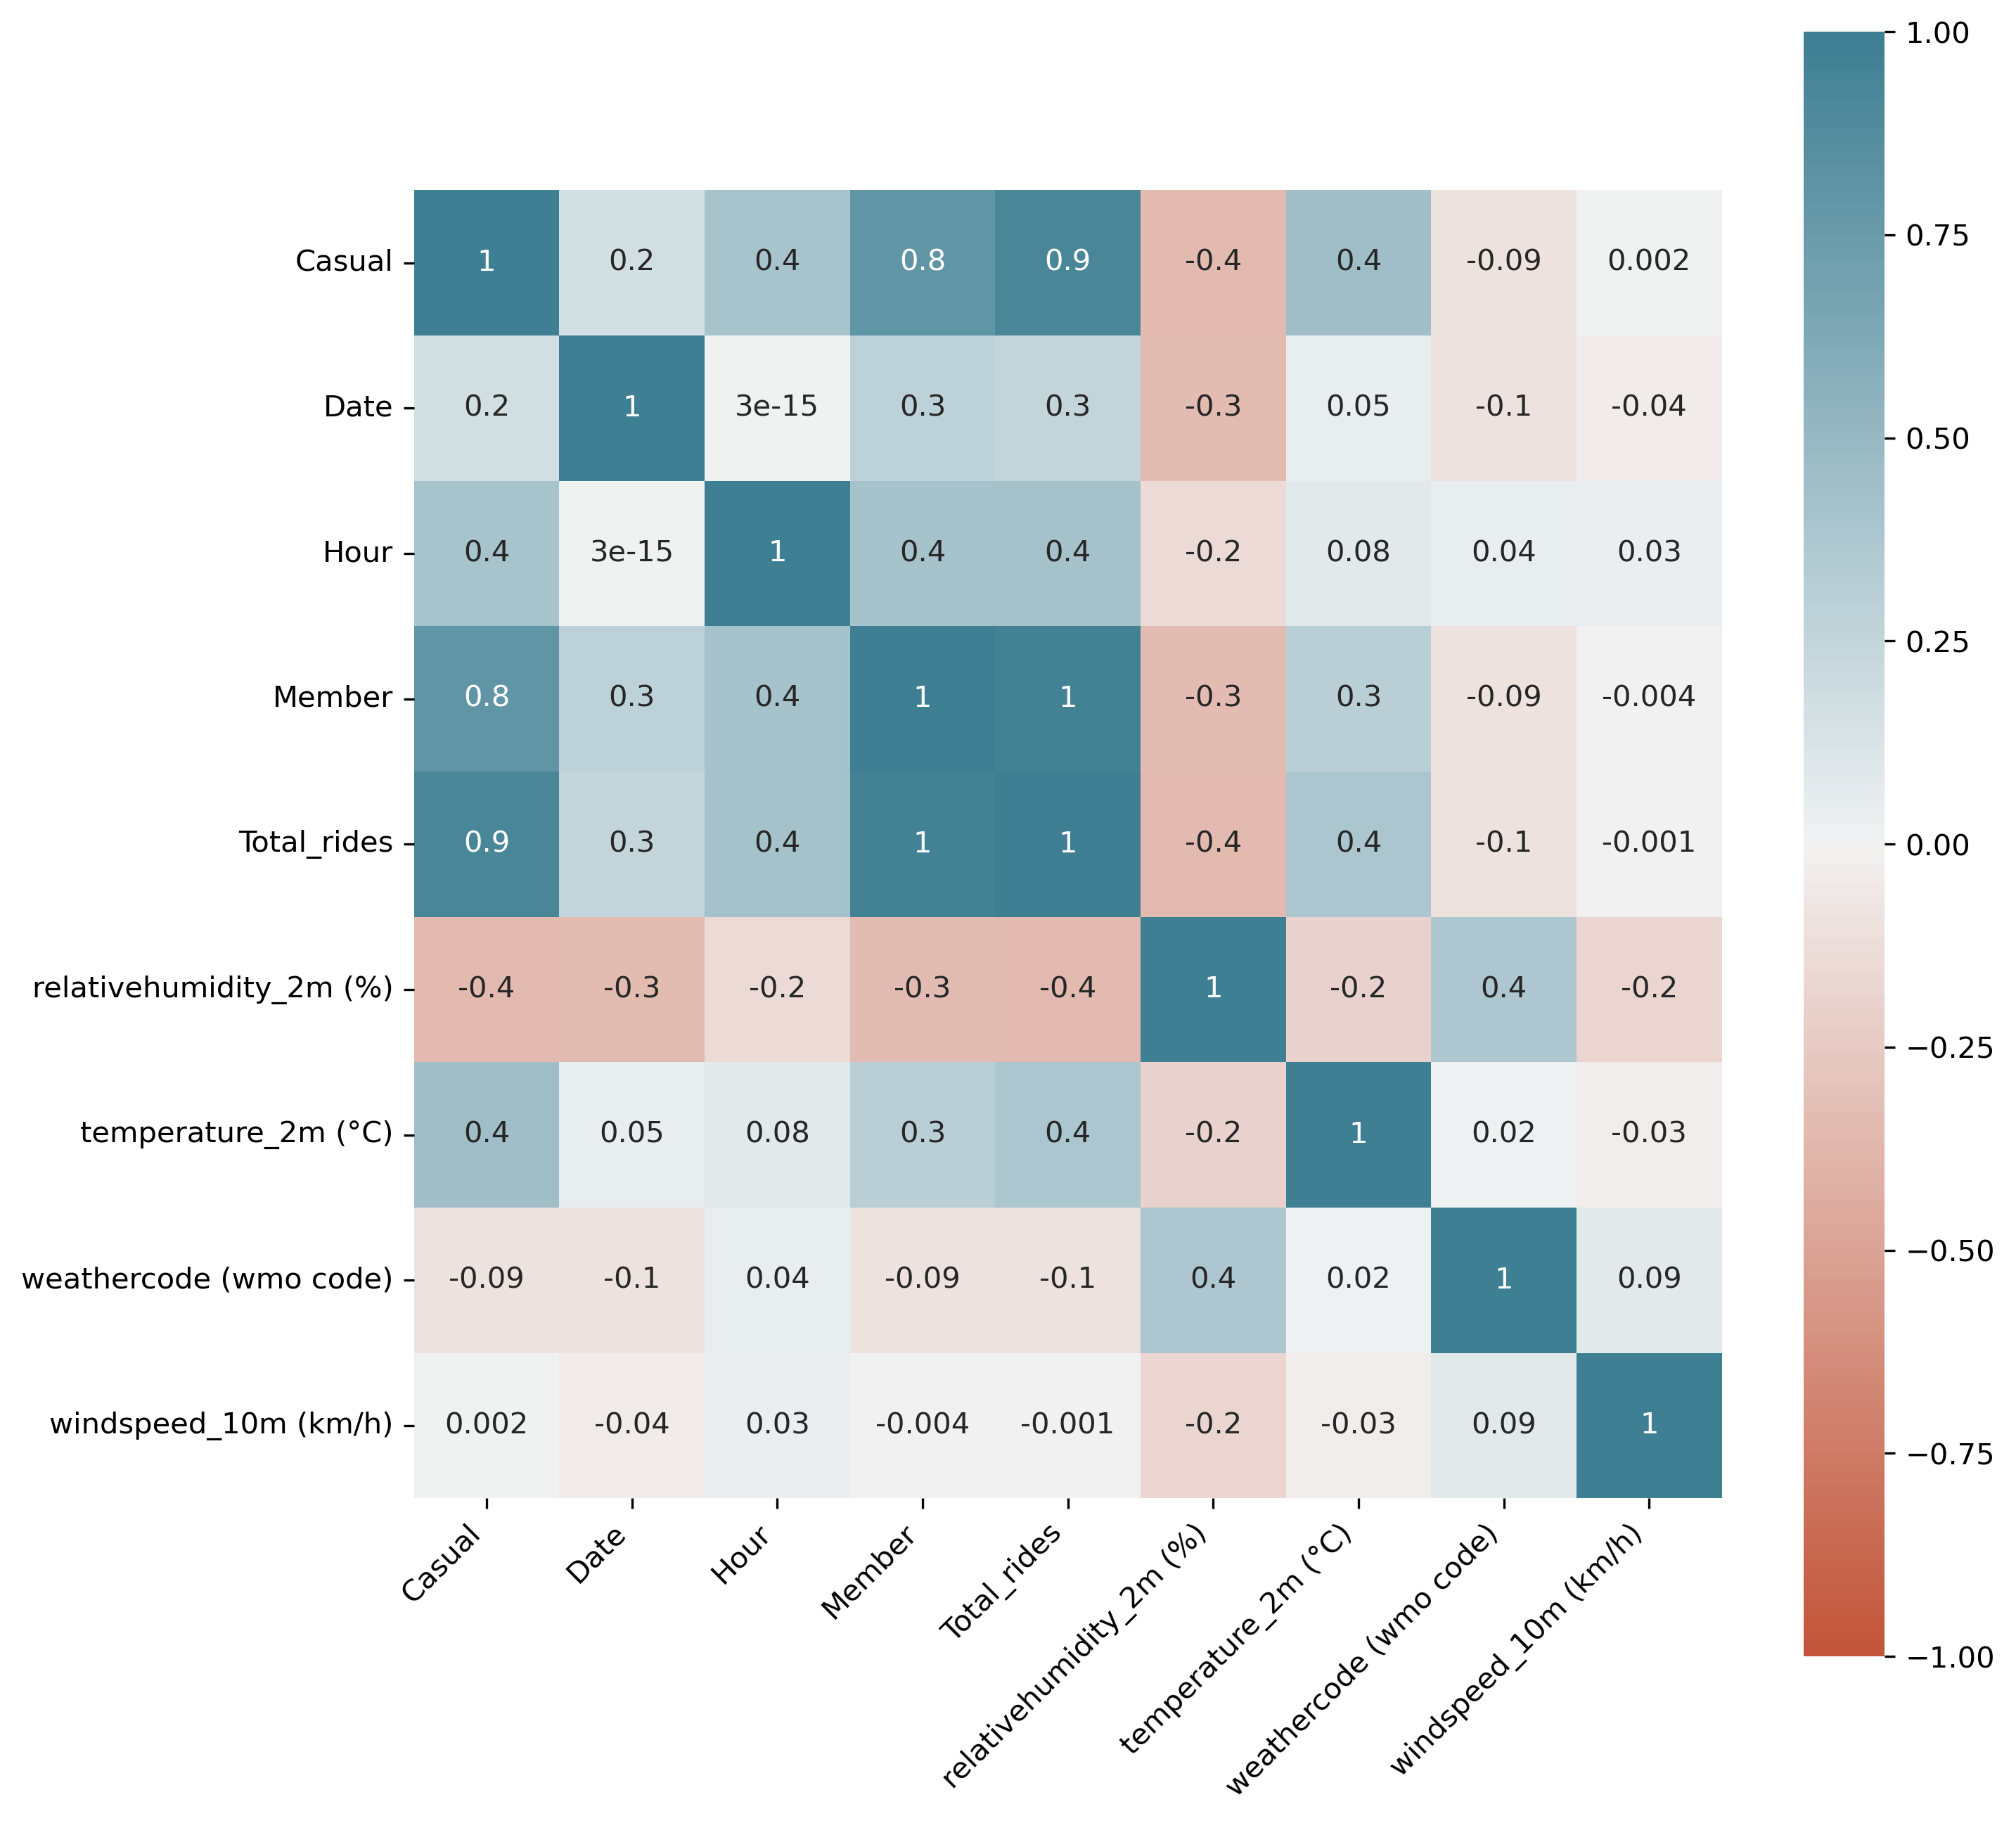

In [13]:
bike_data_hourly_corr = bike_data_hourly.drop(columns=['humidity_catogorised','temp_catogorised','weather_catagorised','wind_catagorised'])

corr = bike_data_hourly_corr.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



<Axes: xlabel='humidity_catogorised', ylabel='Total_rides'>

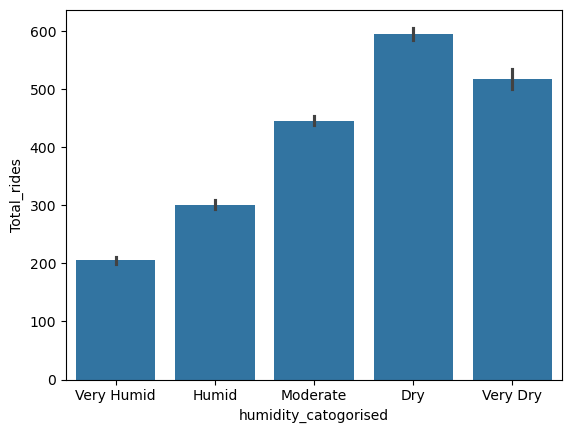

In [14]:
sns.barplot(data=bike_data_hourly, x='humidity_catogorised', y='Total_rides')

<Axes: xlabel='temp_catogorised', ylabel='Date'>

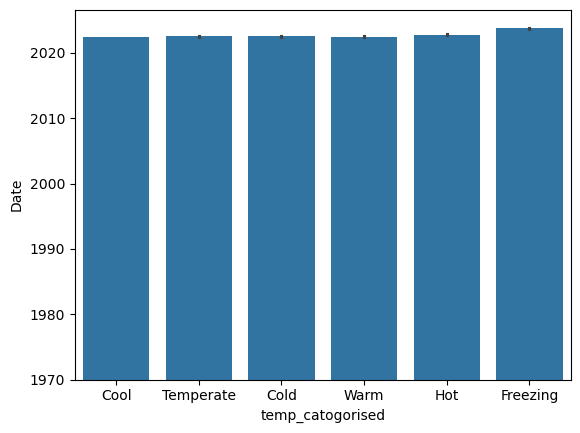

In [15]:
sns.barplot(data=bike_data_hourly, x='temp_catogorised', y='Date')

([0, 1, 2, 3],
 [Text(0, 0, 'Light to Moderate Breeze'),
  Text(1, 0, 'Calm'),
  Text(2, 0, 'Severe Gale to Hurricane'),
  Text(3, 0, 'Fresh to Strong Breeze')])

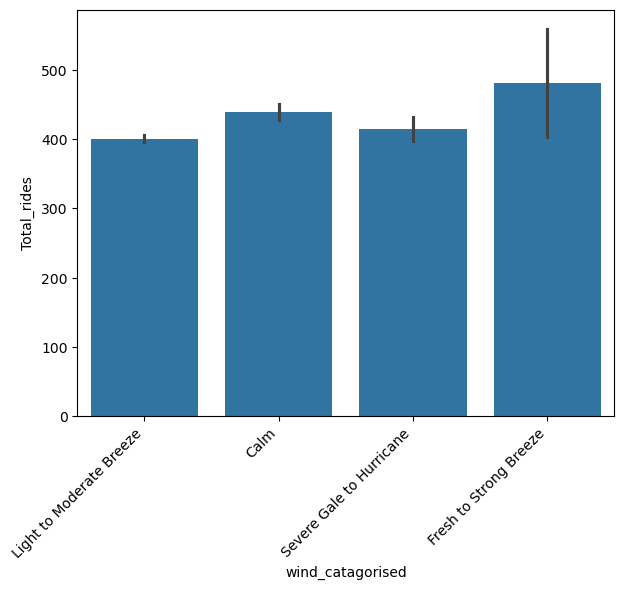

In [16]:
sns.barplot(data=bike_data_hourly, x='wind_catagorised', y='Total_rides')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

In [17]:
bike_data_hourly['Hour'].max()

np.int64(23)

In [18]:
print(bike_data_hourly['temperature_2m (°C)'].min())

-14.6


In [19]:
bike_data_hourly['Hour'] = pd.to_datetime(bike_data_hourly['Hour'], format='%H')

In [20]:
bike_data_daily['Date'] = pd.to_datetime(bike_data_daily['Date'], format='%Y-%m-%d')

In [21]:
bike_data_hourly['day_time'] = bike_data_hourly['Hour'].dt.hour.apply(lambda value: ' early morning'
if value <= 6 else 'late morning'
if value <= 12 else 'afternoon'
if value <= 18 else 'night')

<Axes: xlabel='day_time', ylabel='Casual'>

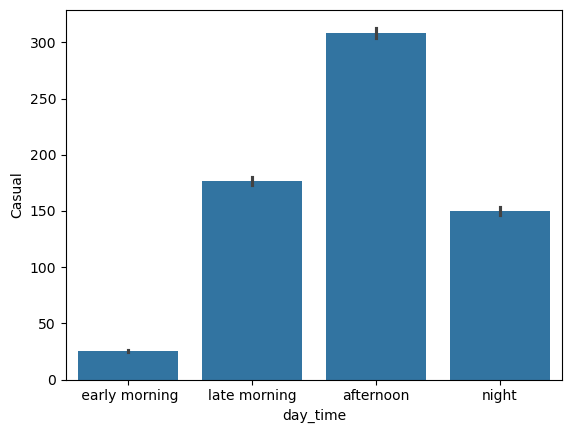

In [22]:
sns.barplot(data=bike_data_hourly, x='day_time', y='Casual')

<Axes: xlabel='day_time', ylabel='Total_rides'>

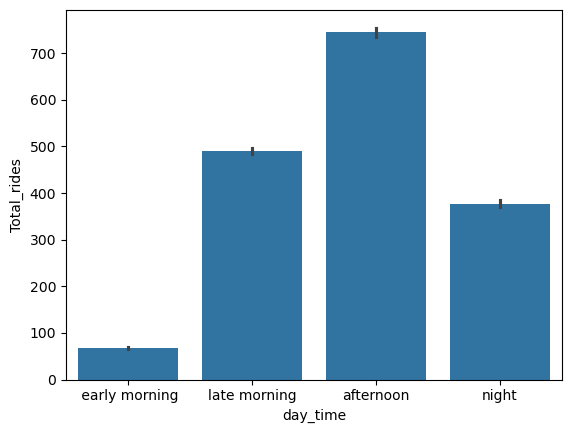

In [23]:
sns.barplot(data=bike_data_hourly, x='day_time', y='Total_rides')

<Axes: xlabel='day_time', ylabel='Total_rides'>

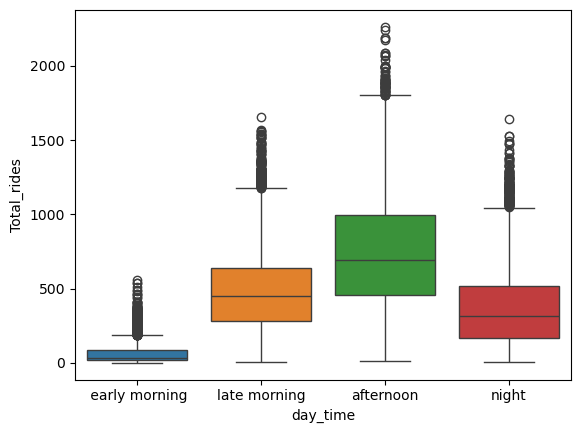

In [24]:
sns.boxplot(data=bike_data_hourly, hue='day_time', x='day_time', y='Total_rides')

In [25]:
bike_data_daily['weathercode (wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65])

In [26]:
bike_data_daily['Date'] = pd.to_datetime(bike_data_daily['Date'])

In [27]:
def get_season(Date):
    month = Date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'

bike_data_daily['season'] = bike_data_daily['Date'].apply(get_season)

In [28]:
import holidays

us_holidays = holidays.US()

bike_data_daily['holiday'] = bike_data_daily['Date'].apply(lambda value: value in us_holidays)

print(bike_data_daily[['Date', 'holiday']].head())

        Date  holiday
0 2021-01-01     True
1 2021-01-02    False
2 2021-01-03    False
3 2021-01-04    False
4 2021-01-05    False


In [29]:
weather = {
0:	'Clear sky',
1:	'Mainly clear',
2:	'Partly cloudy',
3:	'Overcast',
51:	'Light drizzle',
53:	'Moderate drizzle',
55:	'Dense drizzle',
61:	'Slight rain',
63:	'Moderate rain',
65:	'Heavy rain',
71:	'Slight snow fall',
73:	'Moderate snow fall',
75:	'Heavy snow fall'
}

bike_data_daily['weather'] = bike_data_daily['weathercode (wmo code)'].map(weather)

In [30]:
bike_data_daily.head()

Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   season  holiday        weather  
0  winter     True  Moderate rain  
1  winter    False    Slight rain  
2  winter    False  Moderate rain  
3  winter    False       Overcast  
4  winter    False  Light drizzle

In [31]:
def feel(temp):
    if temp >= 30:
        return 'Hot'
    elif 20 <= temp < 30:
        return 'Warm'
    elif 10 <= temp < 20:
        return 'Temperate'
    elif 0 <= temp < 10:
        return 'Cool'
    elif -10 <= temp < 0:
        return 'Cold'
    else:  # temp < -10
        return 'Freezing'

bike_data_daily['feels'] = bike_data_daily['apparent_temperature_mean (°C)'].apply(feel)

In [32]:
bike_data_daily.head()

Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   season  holiday        weather feels  
0  winter     True  Moderate rain  Cold  
1  winter    False    Slight rain  Cool  
2  winter    False  Moderate rain  Cool  
3  winter    False       Overcast  Cool  
4  winter    False  Light drizzle  Cool

In [33]:
for value in bike_data_daily:
    bike_data_daily['percentage_of_members'] = round((bike_data_daily['Member'] / bike_data_daily['Total_rides']) * 100, 2)


In [34]:
def wind_feel(speed):
    if speed <= 5:
        return 'Calm'
    elif 6 <= speed <= 28:
        return 'Light to Moderate Breeze'
    elif 29 <= speed <= 61:
        return 'Fresh to Strong Breeze'
    elif 62 <= speed <= 88:
        return 'High Wind to Gale'
    else:  # speed > 88
        return 'Severe Gale to Hurricane'

bike_data_daily['wind_catagorised'] = bike_data_daily['windspeed_10m_max (km/h)'].apply(wind_feel)

In [35]:
bike_data_daily.head()

Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   season  holiday        weather feels  percentage_of_members  \
0  winter     True  Moderate rain  Cold                  61.39   
1  winter    False    Slight rain  Cool                  49.74   
2  winter    False  Moderate rain  Cool                  69.59   
3  winter    False       Overcast  Cool                  69.57   
4  winter    False  Light drizzle  Cool                  65.47   

           wind_catagorised  
0  Light to Moderate Breeze  
1  Light to Moderate Breeze  
2  Light to Moderate Breeze  
3  Light to Moderate Breeze  
4  Light to Moderate Breeze

In [36]:
def year(date):
    get_year = date.year

    if get_year == 2021:
        return '2021'
    elif get_year == 2022:
        return '2022'
    elif get_year == 2023:
        return '2023'

bike_data_daily['year'] = bike_data_daily['Date'].apply(year)

In [37]:
bike_data_daily.head()

Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   season  holiday        weather feels  percentage_of_members  \
0  winter     True  Moderate rain  Cold                  61.39   
1  winter    False    Slight rain  Cool                  49.74   
2  winter    False  Moderate rain  Cool                  69.59   
3  winter    False       Overcast  Cool                  69.57   
4  winter    False  Light drizzle  Cool                  65.47   

           wind_catagorised  year  
0  Light to Moderate Breeze  2021  
1  Light to Moderate Breeze  2021  
2  Light to Moderate Breeze  2021  
3  Light to Moderate Breeze  2021  
4  Light to Moderate Breeze  2021

<Axes: xlabel='season', ylabel='Total_rides'>

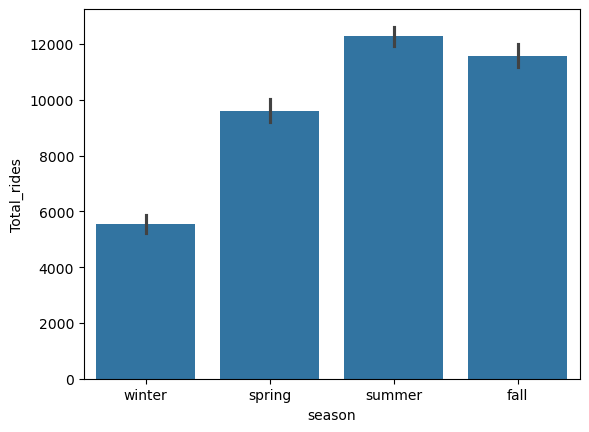

In [38]:
sns.barplot(data=bike_data_daily, x='season', y='Total_rides')

In [39]:
bike_data_daily['day_type'] = bike_data_daily['Date'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [40]:
bike_data_daily.head()

Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   season  holiday        weather feels  percentage_of_members  \
0  winter     True  Moderate rain  Cold                  61.39   
1  winter    False    Slight rain  Cool                  49.74   
2  winter    False  Moderate rain  Cool                  69.59   
3  winter    False       Overcast  Cool                  69.57   
4  winter    False  Light drizzle  Cool                  65.47   

           wind_catagorised  year day_type  
0  Light to Moderate Breeze  2021  Weekday  
1  Light to Moderate Breeze  2021  Weekend  
2  Light to Moderate Breeze  2021  Weekend  
3  Light to Moderate Breeze  2021  Weekday  
4  Light to Moderate Breeze  2021  Weekday

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_61055/3461688526.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bike_data_daily, x='season', y='windspeed_10m_max (km/h)', hue='wind_catagorised',ci=None)


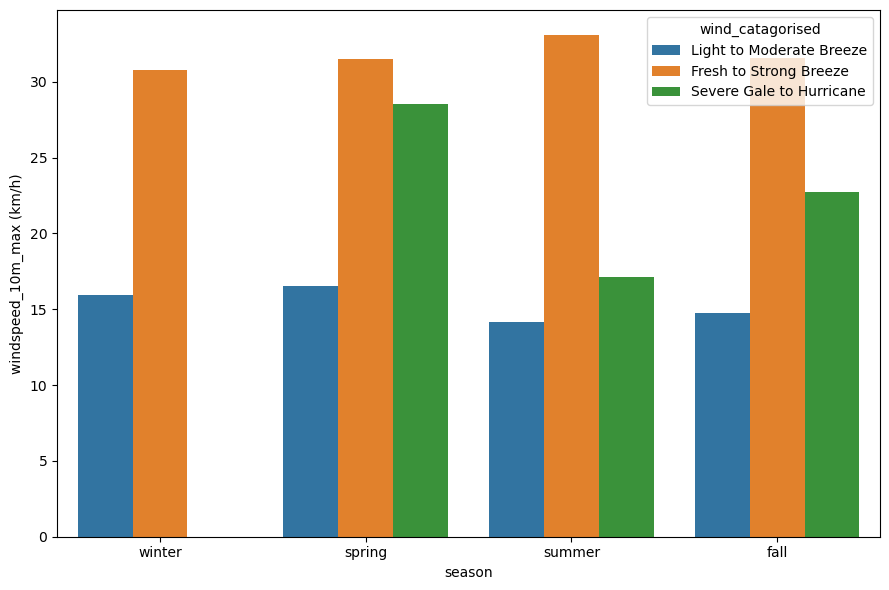

In [41]:
plt.figure(figsize=(9, 6))
sns.barplot(data=bike_data_daily, x='season', y='windspeed_10m_max (km/h)', hue='wind_catagorised',ci=None)
plt.tight_layout()

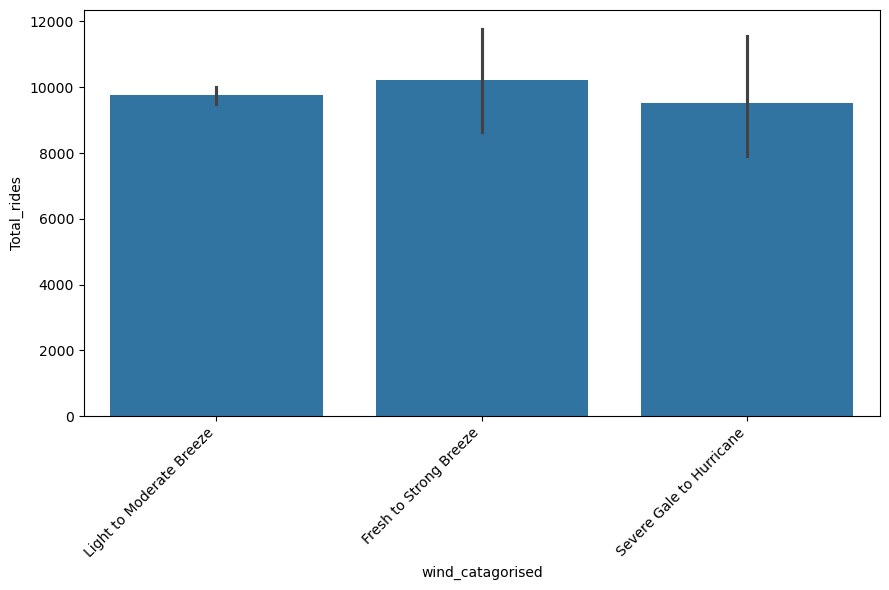

In [42]:
plt.figure(figsize=(9,6))
sns.barplot(data=bike_data_daily, x='wind_catagorised', y='Total_rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: xlabel='holiday', ylabel='Total_rides'>

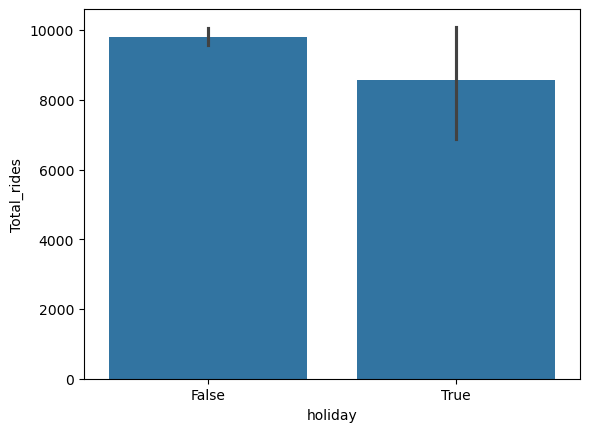

In [43]:
sns.barplot(data=bike_data_daily, x='holiday', y='Total_rides')

[Text(0.5, 0, 'Casual'),
 Text(1.5, 0, 'Date'),
 Text(2.5, 0, 'Member'),
 Text(3.5, 0, 'Total_rides'),
 Text(4.5, 0, 'apparent_temperature_mean (°C)'),
 Text(5.5, 0, 'temperature_2m_mean (°C)'),
 Text(6.5, 0, 'windspeed_10m_max (km/h)'),
 Text(7.5, 0, 'percentage_of_members'),
 Text(8.5, 0, 'year')]

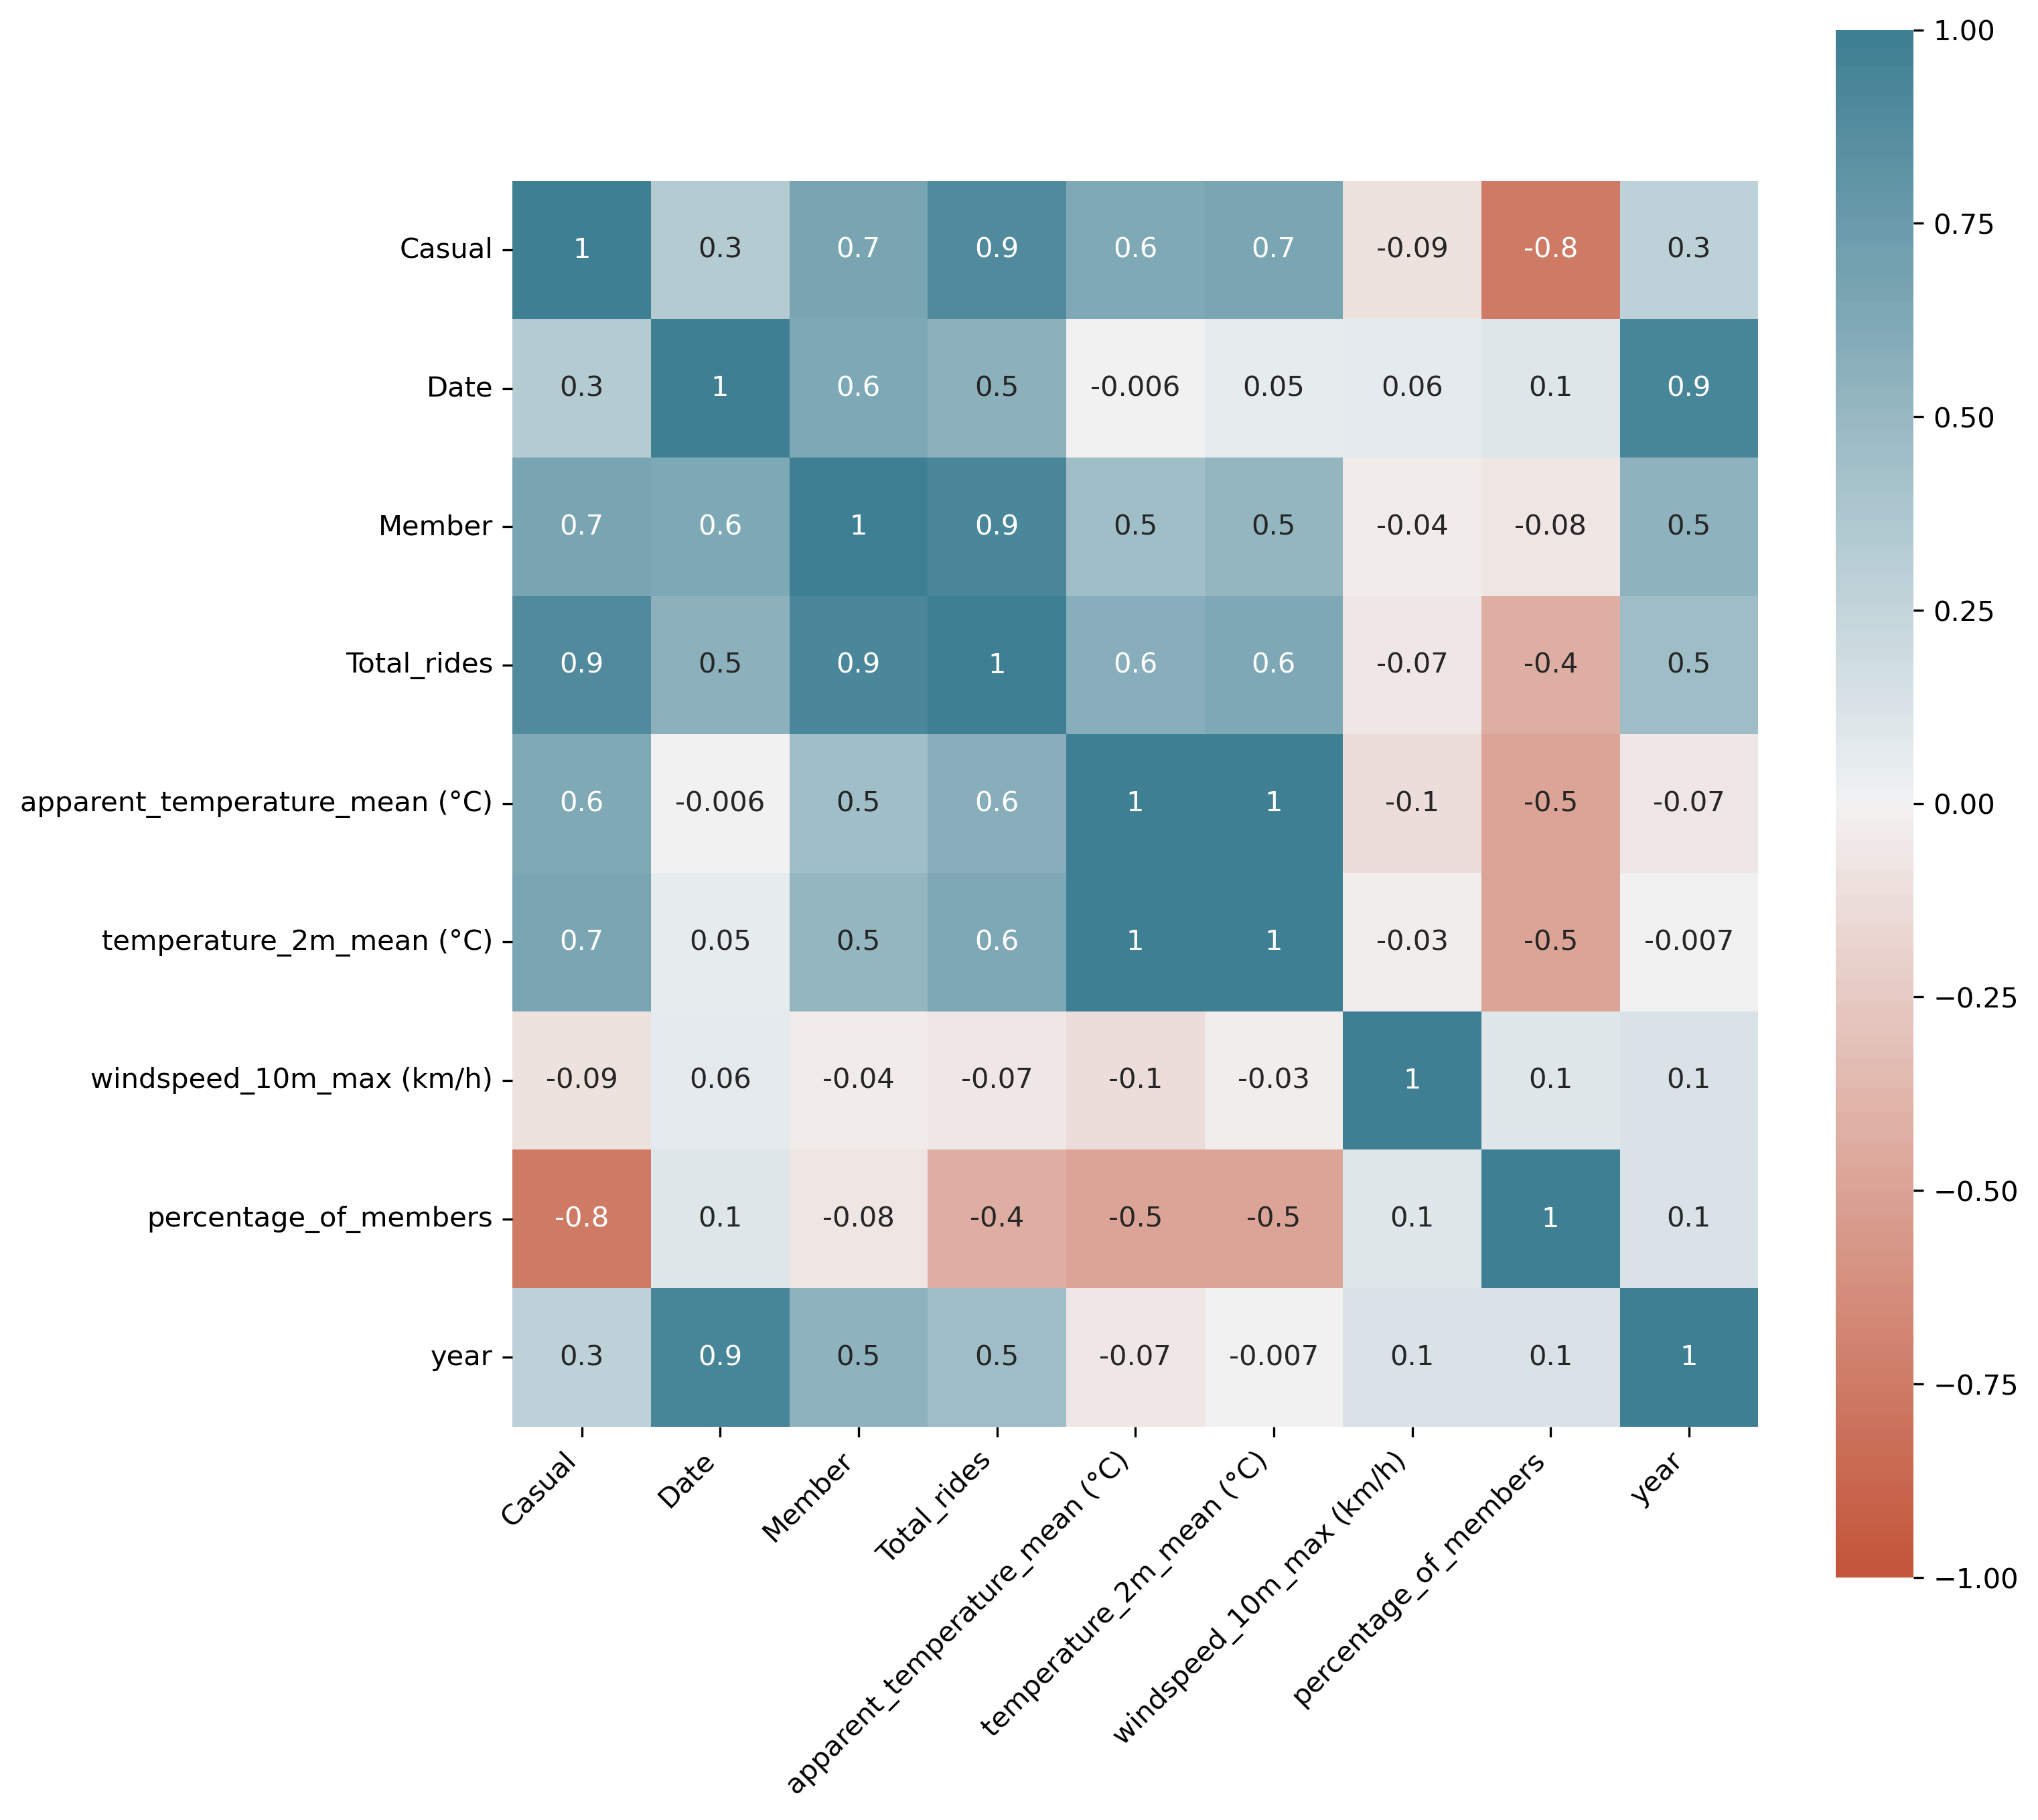

In [44]:
bike_data_daily_corr = bike_data_daily.drop(columns=['season',	'holiday',	'weather',	'feels', 'wind_catagorised', 'day_type', 'weathercode (wmo code)'])
corr = bike_data_daily_corr.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [45]:
bike_data_daily_corr['month'] = bike_data_daily_corr['Date'].dt.month

<Axes: xlabel='temperature_2m_mean (°C)', ylabel='Total_rides'>

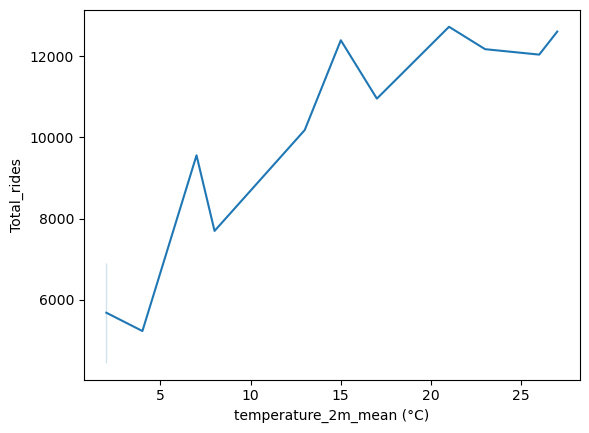

In [46]:

bike_data_daily_corr['year'] = bike_data_daily_corr['year'].astype(int)

bike_data_daily_corr.dropna(inplace=True)

data_grouped = bike_data_daily_corr.groupby('month').mean().reset_index()

data_grouped['temperature_2m_mean (°C)'] = data_grouped['temperature_2m_mean (°C)'].astype(int)

sns.lineplot(data=data_grouped, x='temperature_2m_mean (°C)', y='Total_rides')


In [47]:
data_grouped.dtypes

month                                      int32
Casual                                   float64
Date                              datetime64[ns]
Member                                   float64
Total_rides                              float64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                   int64
windspeed_10m_max (km/h)                 float64
percentage_of_members                    float64
year                                     float64
dtype: object

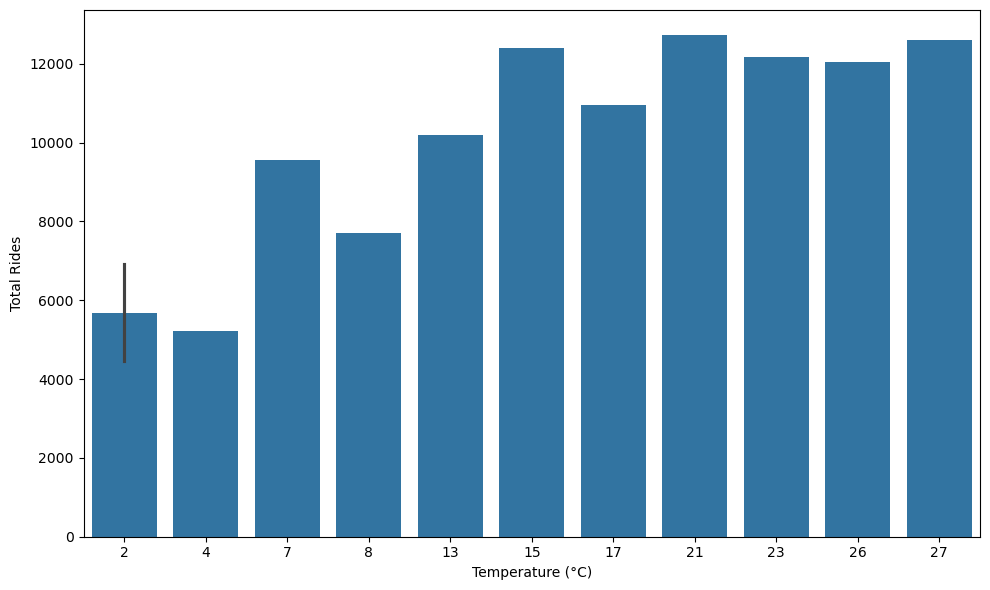

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_grouped, x='temperature_2m_mean (°C)', y='Total_rides')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

In [49]:
bike_data_daily_corr.dtypes

Casual                                     int64
Date                              datetime64[ns]
Member                                     int64
Total_rides                                int64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                 float64
windspeed_10m_max (km/h)                 float64
percentage_of_members                    float64
year                                       int64
month                                      int32
dtype: object

<Axes: xlabel='year', ylabel='percentage_of_members'>

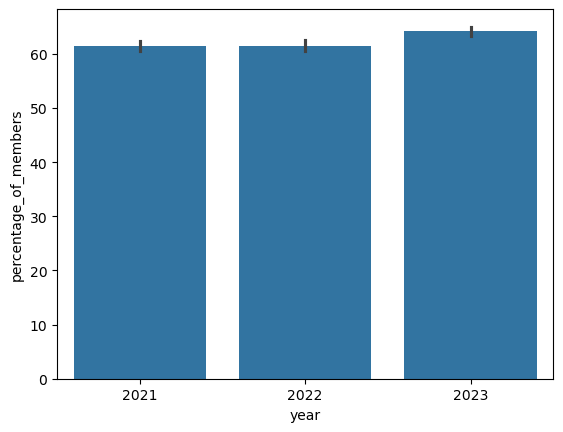

In [50]:
sns.barplot(data=bike_data_daily, x='year', y='percentage_of_members')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Moderate rain'),
  Text(1, 0, 'Slight rain'),
  Text(2, 0, 'Overcast'),
  Text(3, 0, 'Light drizzle'),
  Text(4, 0, 'Partly cloudy'),
  Text(5, 0, 'Mainly clear'),
  Text(6, 0, 'Clear sky'),
  Text(7, 0, 'Moderate drizzle'),
  Text(8, 0, 'Moderate snow fall'),
  Text(9, 0, 'Slight snow fall'),
  Text(10, 0, 'Heavy snow fall'),
  Text(11, 0, 'Dense drizzle'),
  Text(12, 0, 'Heavy rain')])

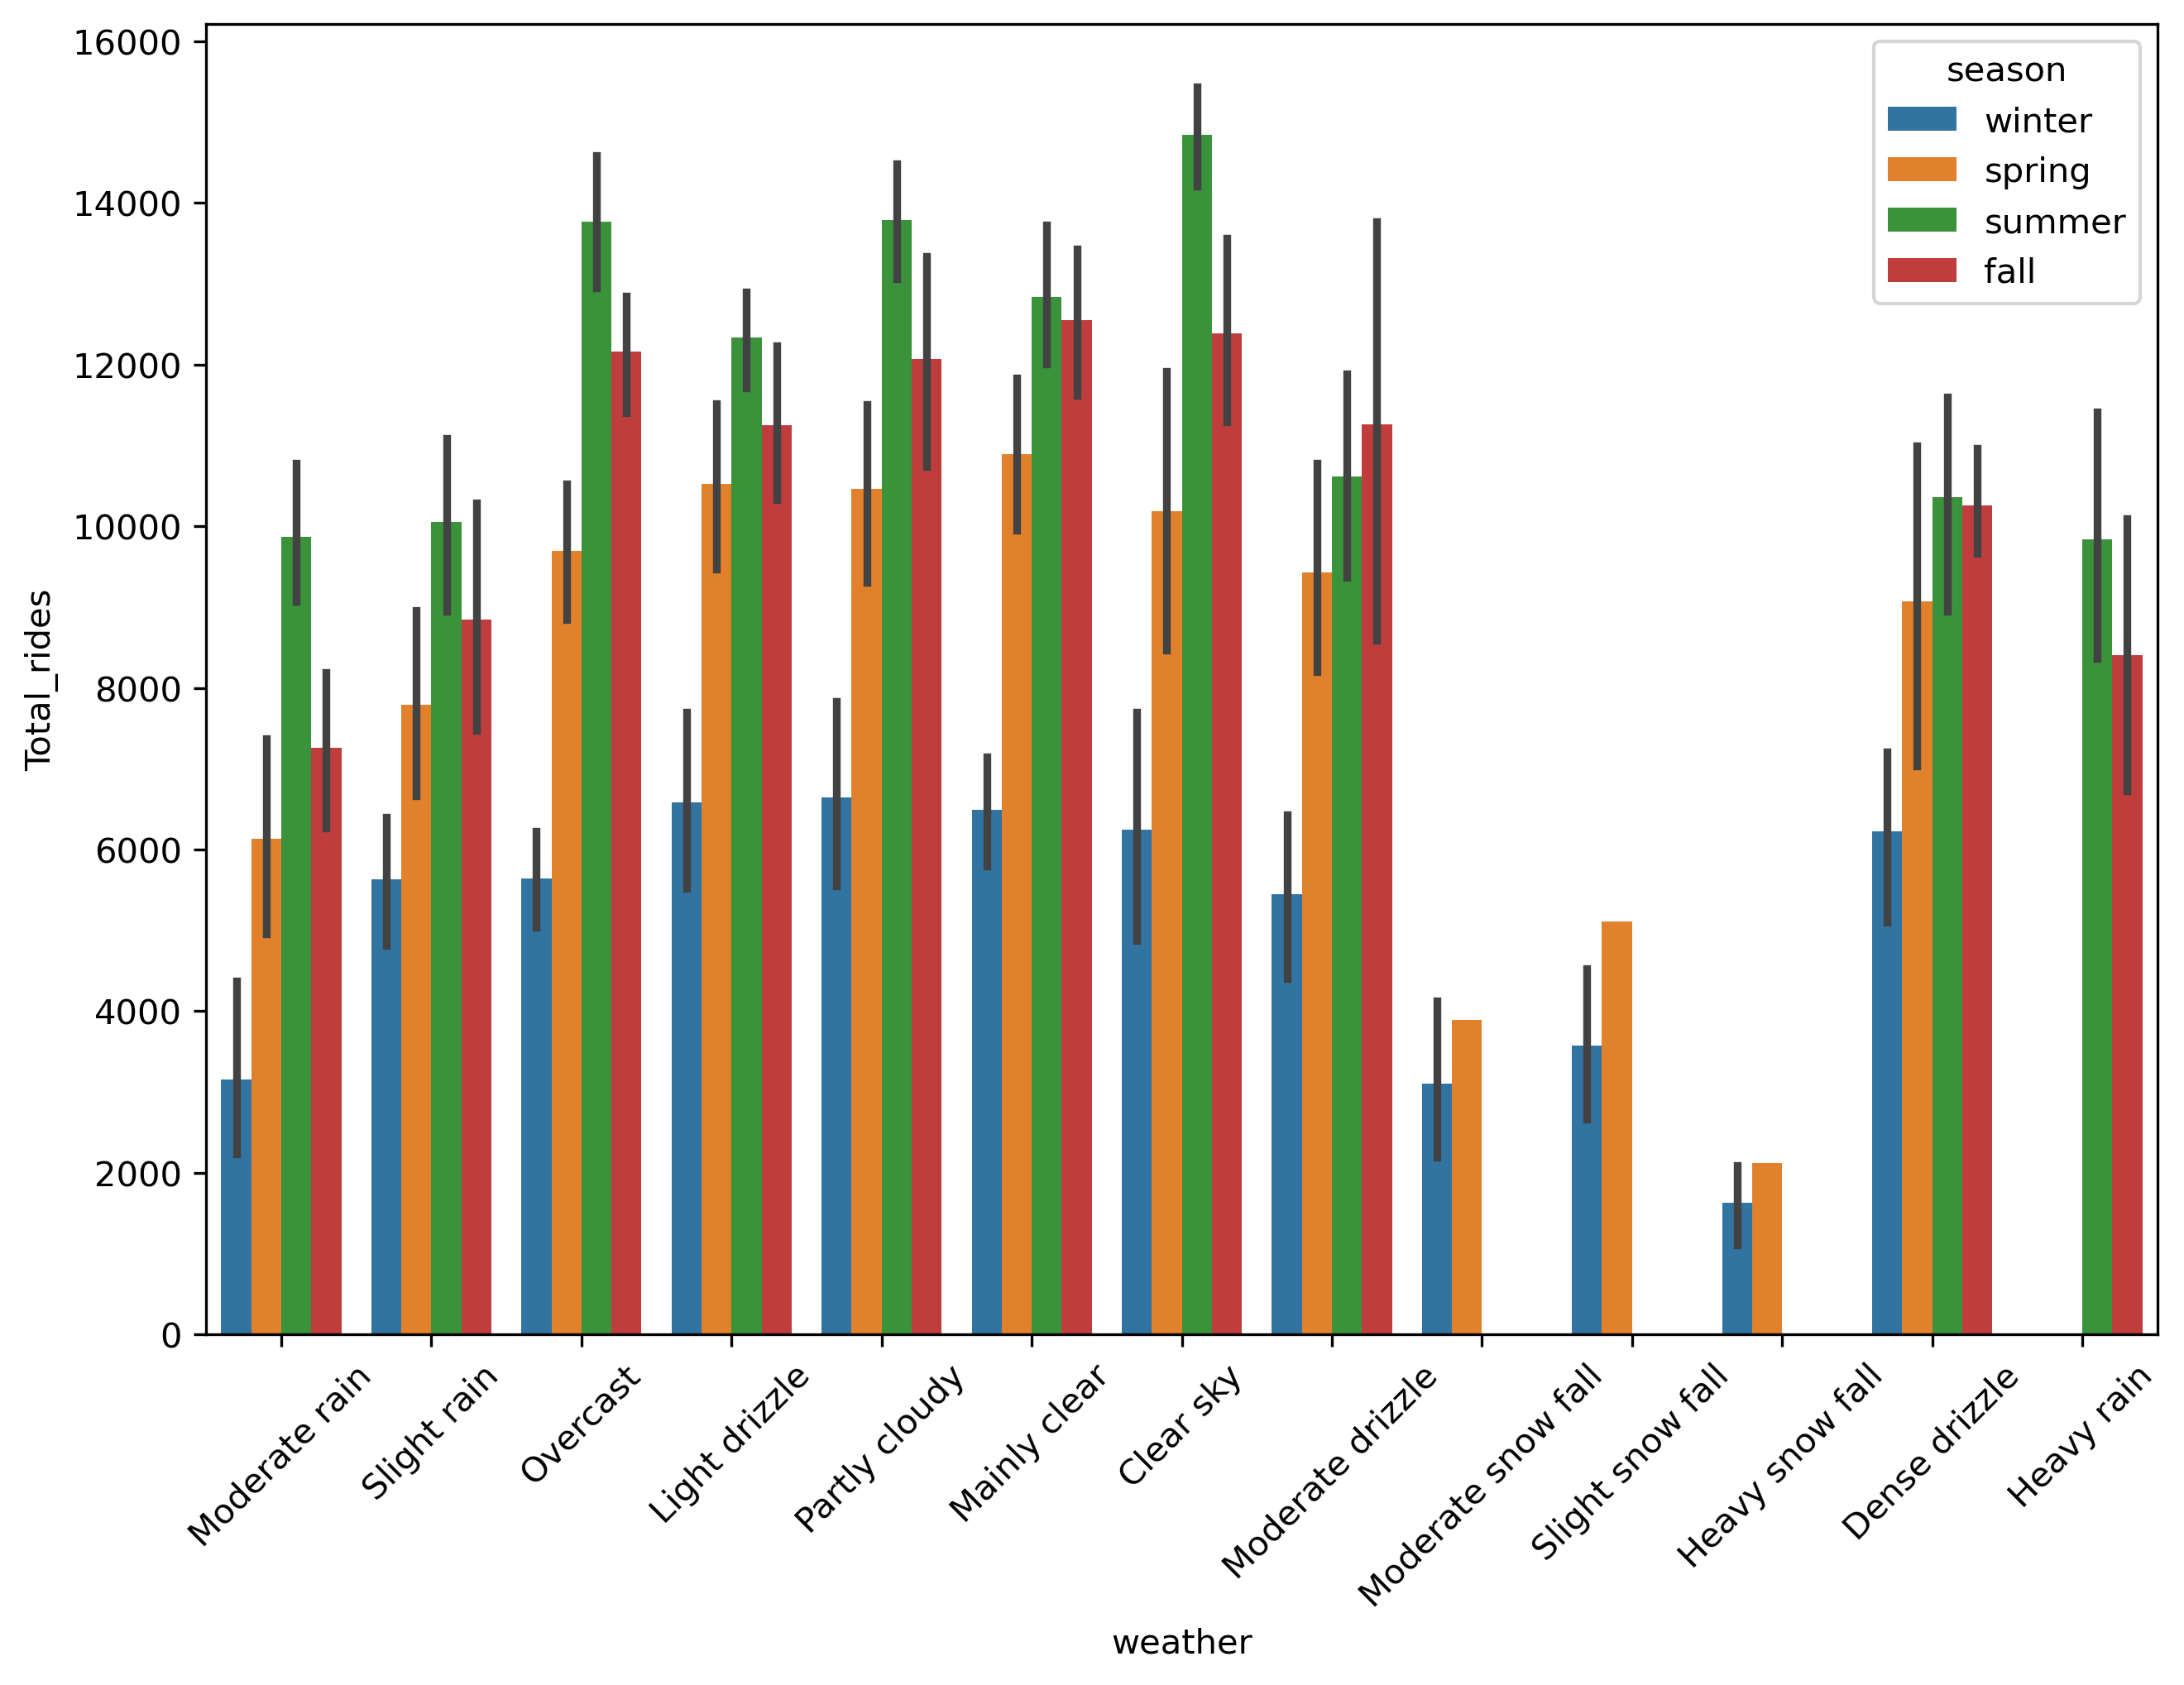

In [51]:
plt.figure(figsize=(9,6),dpi=300)
sns.barplot(data=bike_data_daily, x='weather', y='Total_rides',hue='season')
plt.tight_layout()
plt.xticks(rotation=45)

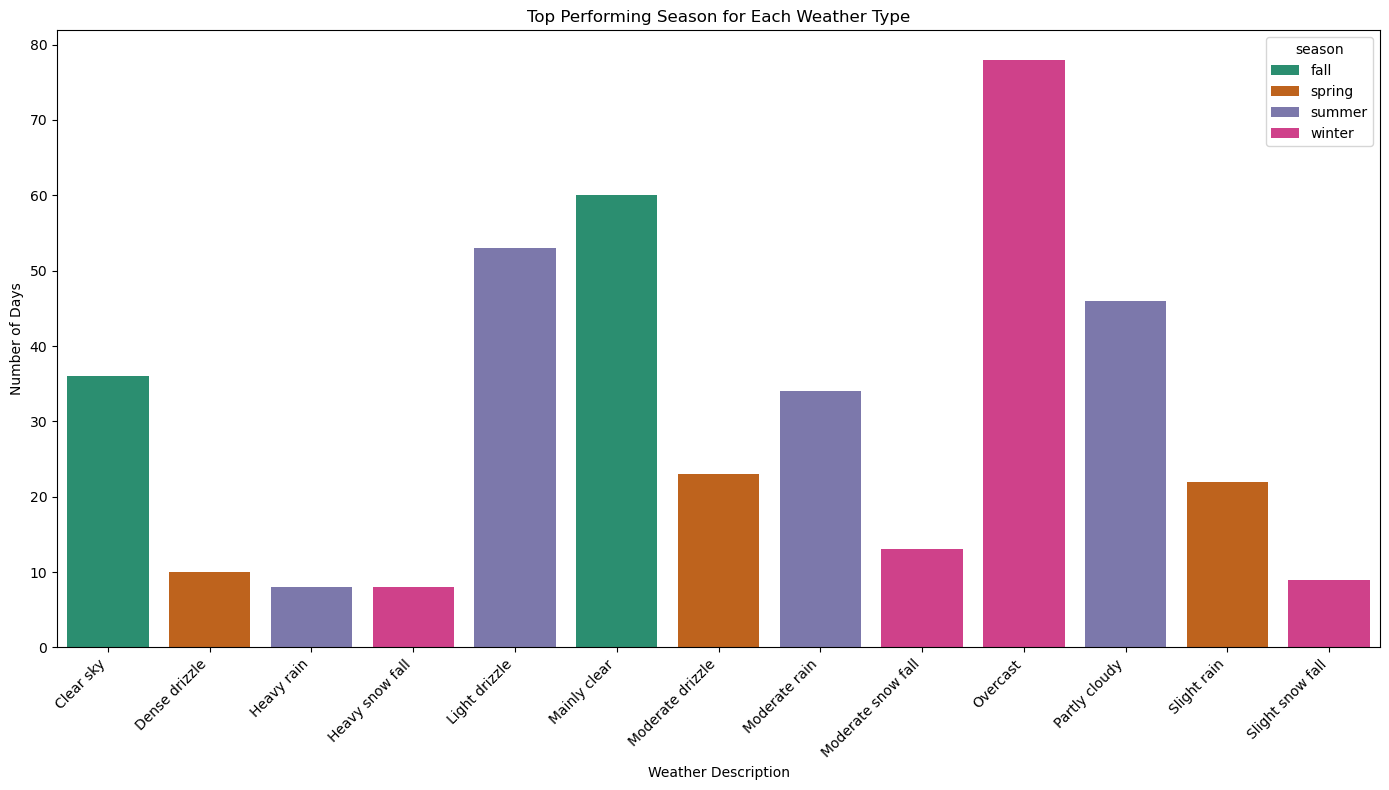

In [52]:
# Group by 'weather_description' and 'season', and count the occurrences
weather_season_counts = bike_data_daily.groupby(['weather', 'season']).size().reset_index(name='counts')

# Initialize an empty list to store the data for plotting
top_weather_season_data = []

# Loop over each unique weather description
for weather in weather_season_counts['weather'].unique():
    # Filter the data to get rows for the specific weather type
    weather_data = weather_season_counts[weather_season_counts['weather'] == weather]
    
    # Find the top performing season for the current weather type
    top_season_for_weather = weather_data.loc[weather_data['counts'].idxmax()]
    
    # Append the data of the top season for this weather type to the list
    top_weather_season_data.append(top_season_for_weather)

# Convert the list into a DataFrame for plotting
top_weather_season_df = pd.DataFrame(top_weather_season_data)

# Create the bar plot for top performing seasons of each weather type
plt.figure(figsize=(14, 8))
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
sns.barplot(data=top_weather_season_df, x='weather', y='counts', hue='season', palette='Dark2')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title('Top Performing Season for Each Weather Type')
plt.xlabel('Weather Description')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()





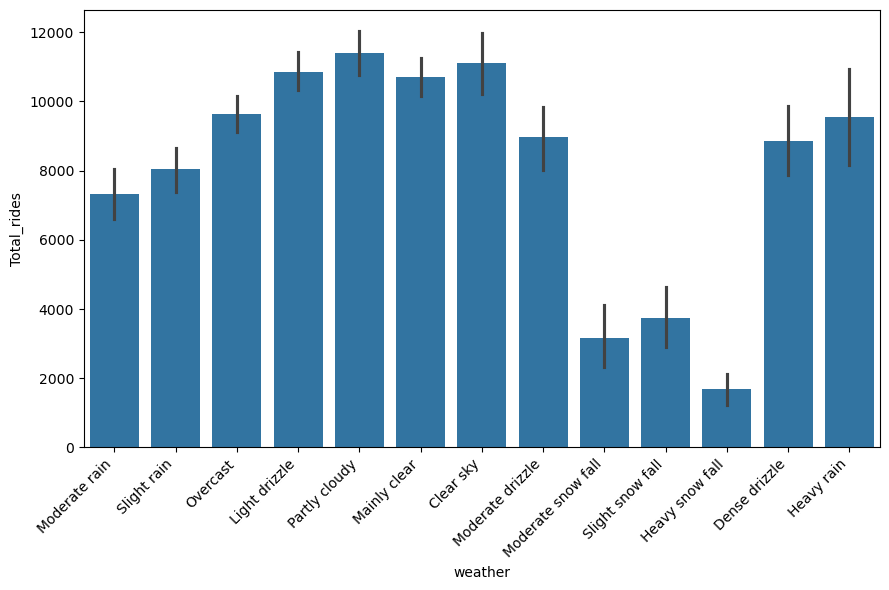

In [53]:
plt.figure(figsize=(9,6))
sns.barplot(data=bike_data_daily, x='weather', y='Total_rides' )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: xlabel='season', ylabel='percentage_of_members'>

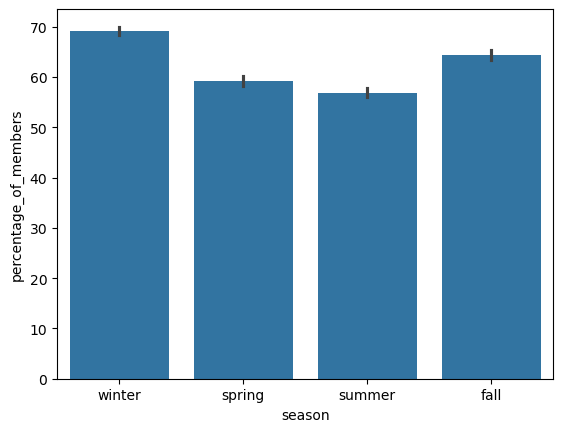

In [54]:
sns.barplot(data=bike_data_daily, x='season', y='percentage_of_members')

<Axes: xlabel='feels', ylabel='Total_rides'>

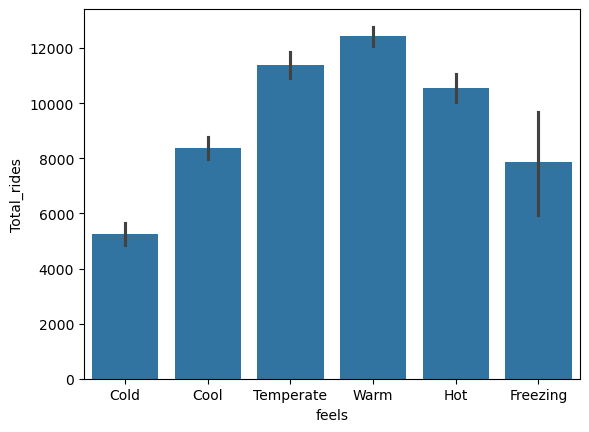

In [55]:
sns.barplot(data=bike_data_daily, x='feels', y='Total_rides')

In [56]:
bike_data_daily.head()

Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   season  holiday        weather feels  percentage_of_members  \
0  winter     True  Moderate rain  Cold                  61.39   
1  winter    False    Slight rain  Cool                  49.74   
2  winter    False  Moderate rain  Cool                  69.59   
3  winter    False       Overcast  Cool                  69.57   
4  winter    False  Light drizzle  Cool                  65.47   

           wind_catagorised  year day_type  
0  Light to Moderate Breeze  2021  Weekday  
1  Light to Moderate Breeze  2021  Weekend  
2  Light to Moderate Breeze  2021  Weekend  
3  Light to Moderate Breeze  2021  Weekday  
4  Light to Moderate Breeze  2021  Weekday

<Axes: xlabel='day_type', ylabel='Member'>

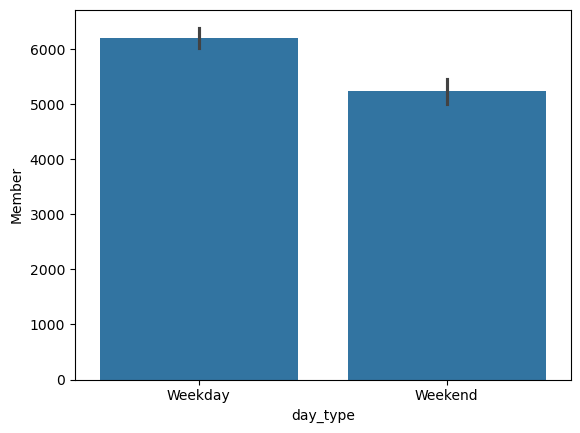

In [57]:
sns.barplot(data=bike_data_daily, x='day_type', y='Member')

<Axes: xlabel='day_type', ylabel='Casual'>

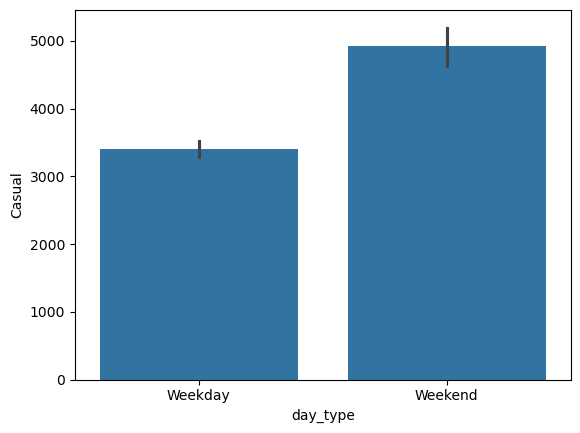

In [58]:
sns.barplot(data=bike_data_daily, x='day_type', y='Casual')

In [59]:
full_data = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Full.csv')

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_61055/4054110523.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Full.csv')


In [60]:
full_data.index.max()

10693996

In [61]:
bike_data_daily.index.max()

1094

In [62]:
full_data['started_at'] = pd.to_datetime(full_data['started_at'])

full_data['ended_at'] = pd.to_datetime(full_data['ended_at'])

full_data['ride_duration'] = full_data['ended_at'] - full_data['started_at']

In [63]:
full_data['time_of_day'] = full_data['ended_at'].dt.hour.apply(lambda value : 'early morning'
if value <= 6 else 'late morning'
if value <= 12 else 'afternoon'
if value <= 18 else 'night')

In [64]:
full_data.head()

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33 2021-01-01 00:33:53   
1  629E059504606547  electric_bike 2021-01-01 00:13:43 2021-01-01 00:29:34   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:32 2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike 2021-01-01 00:15:45 2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46 2021-01-01 00:21:00   

              start_station_name start_station_id  \
0          Maine Ave & 9th St SW          31646.0   
1                 10th & U St NW          31111.0   
2          17th & Corcoran St NW          31214.0   
3  Wilson Blvd. & N. Vermont St.          31926.0   
4              11th & Park Rd NW          31651.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                       NaN            NaN  38.917193   
2                      14th & Belmont St NW        31119.0  38.912138   
3             Wilson Blvd. & N. Vermont St.        31926.0  38.879477   
4                       14th & Newton St NW        31649.0  38.931322   

   start_lng    end_lat    end_lng member_casual   ride_duration  \
0 -77.025236  38.894600 -77.072305        member 0 days 00:25:20   
1 -77.025894  38.960000 -77.020000        casual 0 days 00:15:51   
2 -77.038568  38.920870 -77.031691        member 0 days 00:14:13   
3 -77.114563  38.879477 -77.114563        member 0 days 00:05:35   
4 -77.028247  38.931991 -77.032956        member 0 days 00:03:14   

     time_of_day  
0  early morning  
1  early morning  
2  early morning  
3  early morning  
4  early morning

In [65]:
full_data.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_duration         timedelta64[ns]
time_of_day                    object
dtype: object

In [66]:
ride_length = full_data['ride_duration'].mean()

In [67]:
early_morning_rides = full_data[full_data['time_of_day'] == 'early morning']

mean_early_morning_duration = early_morning_rides['ride_duration'].mean()

print(mean_early_morning_duration)

0 days 00:29:20.116213737


In [68]:
late_morning_rides = full_data[full_data['time_of_day'] == 'late morning']

mean_late_morning_duration = late_morning_rides['ride_duration'].mean()

print(mean_late_morning_duration)

0 days 00:20:51.325398614


In [69]:
afternoon_rides = full_data[full_data['time_of_day'] == 'afternoon']

mean_afternoon_duration = afternoon_rides['ride_duration'].mean()

print(mean_afternoon_duration)

0 days 00:23:30.122206657


In [70]:
# Filter for 'night' rides
night_rides = full_data[full_data['time_of_day'] == 'night']

# Calculate the mean ride duration for night rides
mean_night_duration = night_rides['ride_duration'].mean()

# Print the result
print(mean_night_duration)


0 days 00:22:54.984420153


In [71]:
print(ride_length)

0 days 00:22:54.468217917


In [72]:
full_data['day_of_week'] = full_data['ended_at'].dt.dayofweek

days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

full_data['day_of_week'] = full_data['day_of_week'].map(days)

In [73]:
full_data.head()

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33 2021-01-01 00:33:53   
1  629E059504606547  electric_bike 2021-01-01 00:13:43 2021-01-01 00:29:34   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:32 2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike 2021-01-01 00:15:45 2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46 2021-01-01 00:21:00   

              start_station_name start_station_id  \
0          Maine Ave & 9th St SW          31646.0   
1                 10th & U St NW          31111.0   
2          17th & Corcoran St NW          31214.0   
3  Wilson Blvd. & N. Vermont St.          31926.0   
4              11th & Park Rd NW          31651.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                       NaN            NaN  38.917193   
2                      14th & Belmont St NW        31119.0  38.912138   
3             Wilson Blvd. & N. Vermont St.        31926.0  38.879477   
4                       14th & Newton St NW        31649.0  38.931322   

   start_lng    end_lat    end_lng member_casual   ride_duration  \
0 -77.025236  38.894600 -77.072305        member 0 days 00:25:20   
1 -77.025894  38.960000 -77.020000        casual 0 days 00:15:51   
2 -77.038568  38.920870 -77.031691        member 0 days 00:14:13   
3 -77.114563  38.879477 -77.114563        member 0 days 00:05:35   
4 -77.028247  38.931991 -77.032956        member 0 days 00:03:14   

     time_of_day day_of_week  
0  early morning      Friday  
1  early morning      Friday  
2  early morning      Friday  
3  early morning      Friday  
4  early morning      Friday

In [74]:
full_data['ride_duration_minutes'] = full_data['ride_duration'].dt.total_seconds() / 60

In [75]:
full_data = full_data.drop(columns='ride_duration')

In [76]:
full_data.head()

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33 2021-01-01 00:33:53   
1  629E059504606547  electric_bike 2021-01-01 00:13:43 2021-01-01 00:29:34   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:32 2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike 2021-01-01 00:15:45 2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46 2021-01-01 00:21:00   

              start_station_name start_station_id  \
0          Maine Ave & 9th St SW          31646.0   
1                 10th & U St NW          31111.0   
2          17th & Corcoran St NW          31214.0   
3  Wilson Blvd. & N. Vermont St.          31926.0   
4              11th & Park Rd NW          31651.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                       NaN            NaN  38.917193   
2                      14th & Belmont St NW        31119.0  38.912138   
3             Wilson Blvd. & N. Vermont St.        31926.0  38.879477   
4                       14th & Newton St NW        31649.0  38.931322   

   start_lng    end_lat    end_lng member_casual    time_of_day day_of_week  \
0 -77.025236  38.894600 -77.072305        member  early morning      Friday   
1 -77.025894  38.960000 -77.020000        casual  early morning      Friday   
2 -77.038568  38.920870 -77.031691        member  early morning      Friday   
3 -77.114563  38.879477 -77.114563        member  early morning      Friday   
4 -77.028247  38.931991 -77.032956        member  early morning      Friday   

   ride_duration_minutes  
0              25.333333  
1              15.850000  
2              14.216667  
3               5.583333  
4               3.233333

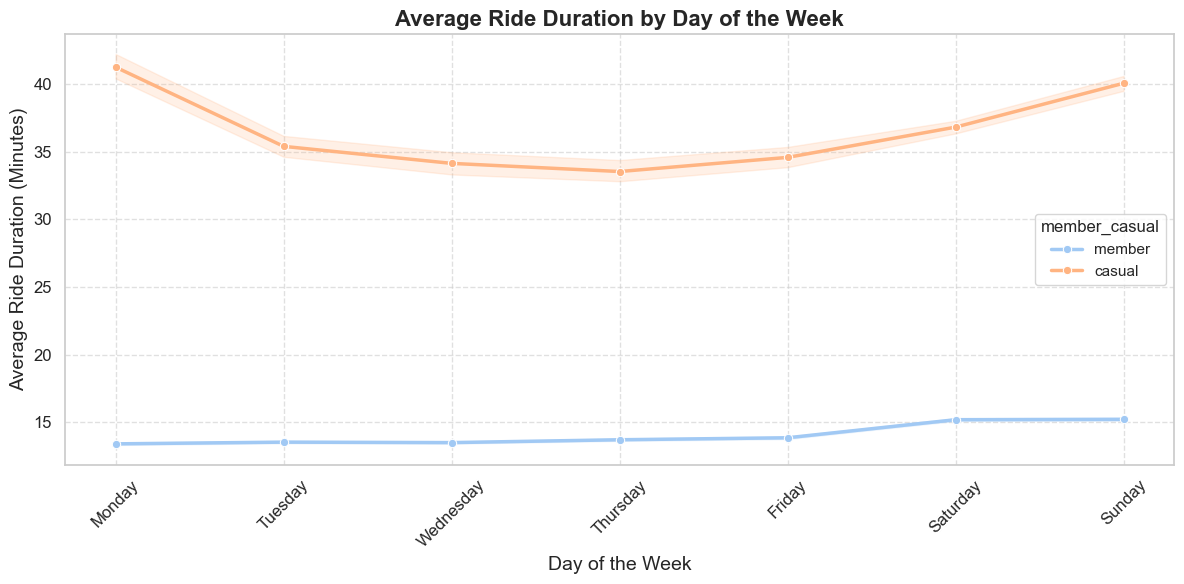

In [77]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
full_data['day_of_week'] = pd.Categorical(full_data['day_of_week'], categories=day_order, ordered=True)
sns.set(style="whitegrid", palette="pastel")

# Create a figure with a defined size
plt.figure(figsize=(12, 6))


sns.lineplot(
    data=full_data,
    x='day_of_week',
    y='ride_duration_minutes',
    hue='member_casual',
    marker='o',  # Add markers for each point
    color='#007acc',  # Custom color for the line
    linewidth=2.5
)

# Add labels and title
plt.title("Average Ride Duration by Day of the Week", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Ride Duration (Minutes)", fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_61055/498555111.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=categories, y=rides, palette=palette)
/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_61055/498555111.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  barplot = sns.barplot(x=categories, y=rides, palette=palette)


Text(0, 0.5, 'Total Rides')

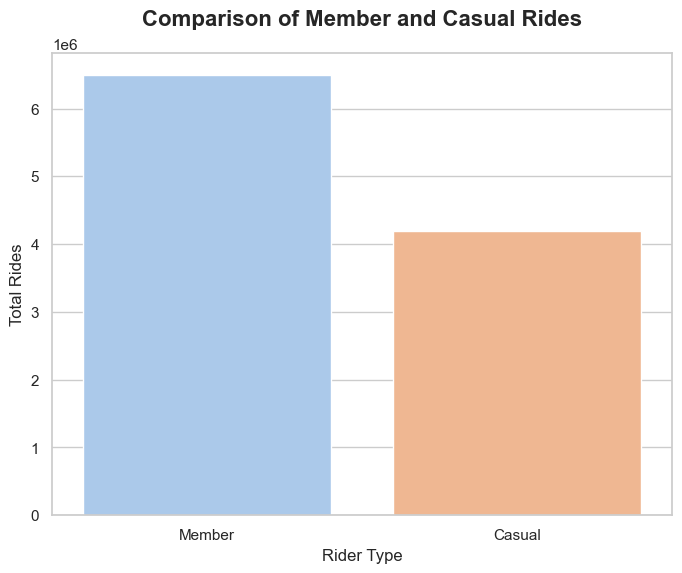

In [78]:

# Summing up the rides
member_rides = bike_data_daily['Member'].sum()
casual_rides = bike_data_daily['Casual'].sum()

# Prepare data for the bar plot
categories = ['Member', 'Casual']
rides = [member_rides, casual_rides]

# Set a style and color palette
sns.set_theme(style="whitegrid")  # Apply a clean theme
palette = sns.color_palette("pastel")  # Choose a pastel color palette

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
barplot = sns.barplot(x=categories, y=rides, palette=palette)

# Add labels, title, and annotations
plt.title("Comparison of Member and Casual Rides", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Rider Type", fontsize=12)
plt.ylabel("Total Rides", fontsize=12)

In [79]:
full_data['year'] = full_data['started_at'].dt.year

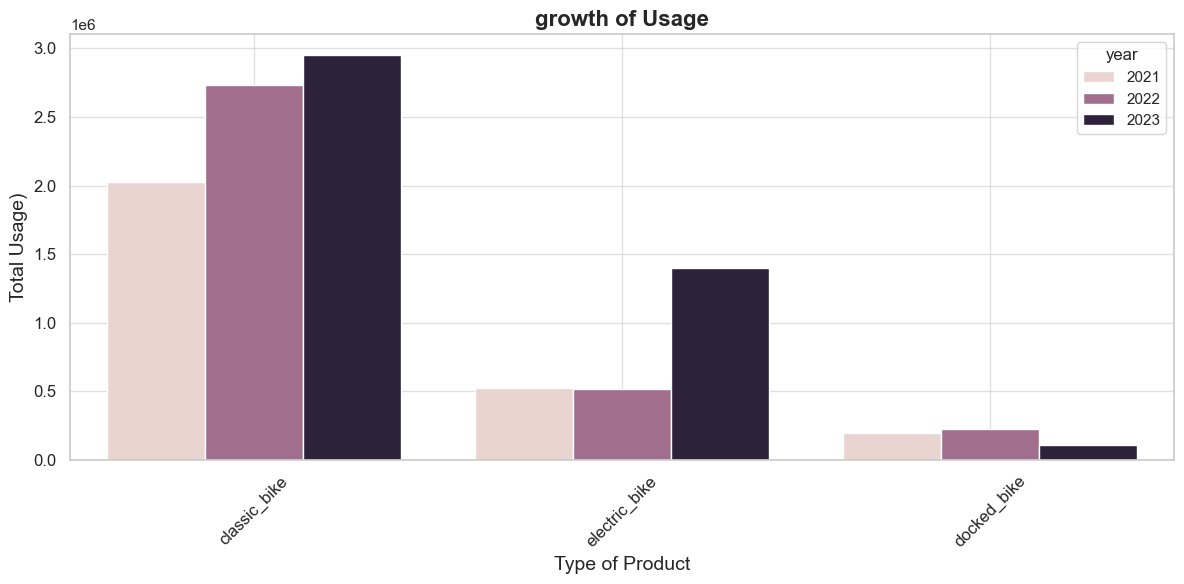

In [80]:
sns.set(style="whitegrid", palette="pastel")

# Create a figure with a defined size
plt.figure(figsize=(12, 6))


sns.countplot(
    data=full_data,
    x='rideable_type',
    hue='year',
)

# Add labels and title
plt.title("growth of Usage", fontsize=16, fontweight='bold')
plt.xlabel("Type of Product", fontsize=14)
plt.ylabel("Total Usage)", fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [81]:
full_data.head()

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33 2021-01-01 00:33:53   
1  629E059504606547  electric_bike 2021-01-01 00:13:43 2021-01-01 00:29:34   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:32 2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike 2021-01-01 00:15:45 2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46 2021-01-01 00:21:00   

              start_station_name start_station_id  \
0          Maine Ave & 9th St SW          31646.0   
1                 10th & U St NW          31111.0   
2          17th & Corcoran St NW          31214.0   
3  Wilson Blvd. & N. Vermont St.          31926.0   
4              11th & Park Rd NW          31651.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                       NaN            NaN  38.917193   
2                      14th & Belmont St NW        31119.0  38.912138   
3             Wilson Blvd. & N. Vermont St.        31926.0  38.879477   
4                       14th & Newton St NW        31649.0  38.931322   

   start_lng    end_lat    end_lng member_casual    time_of_day day_of_week  \
0 -77.025236  38.894600 -77.072305        member  early morning      Friday   
1 -77.025894  38.960000 -77.020000        casual  early morning      Friday   
2 -77.038568  38.920870 -77.031691        member  early morning      Friday   
3 -77.114563  38.879477 -77.114563        member  early morning      Friday   
4 -77.028247  38.931991 -77.032956        member  early morning      Friday   

   ride_duration_minutes  year  
0              25.333333  2021  
1              15.850000  2021  
2              14.216667  2021  
3               5.583333  2021  
4               3.233333  2021

Text(0.5, 1.0, 'Total Usage by Product')

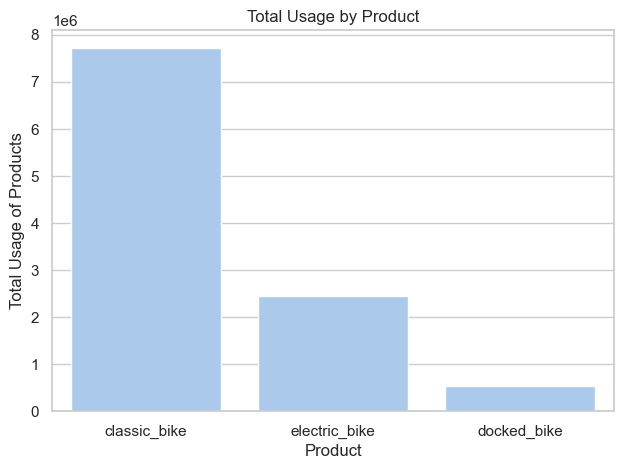

In [82]:
sns.countplot(data=full_data, x='rideable_type')
plt.ylabel('Total Usage of Products')
plt.xlabel('Product')
plt.tight_layout()
plt.title('Total Usage by Product')

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_61055/485933284.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#007acc'` for the same effect.

  sns.barplot(


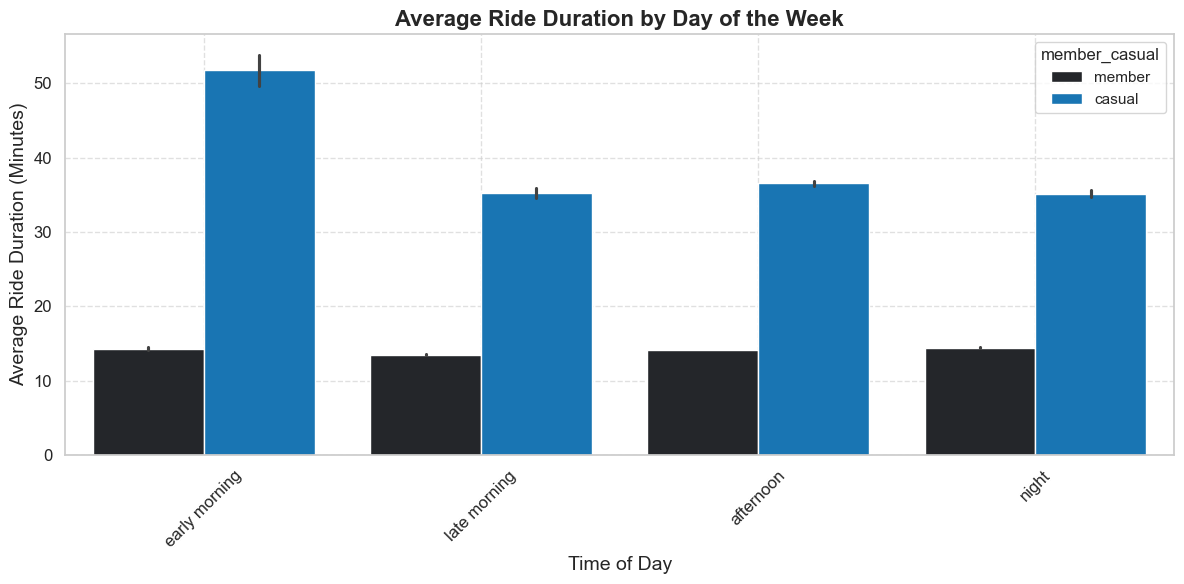

In [83]:
sns.set(style="whitegrid", palette="pastel")

# Create a figure with a defined size
plt.figure(figsize=(12, 6))


sns.barplot(
    data=full_data,
    x='time_of_day',
    y='ride_duration_minutes',
    hue='member_casual',
    color='#007acc',  # Custom color for the line
)

# Add labels and title
plt.title("Average Ride Duration by Day of the Week", fontsize=16, fontweight='bold')
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Average Ride Duration (Minutes)", fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [84]:
full_data['member_casual'].unique()


array(['member', 'casual'], dtype=object)

In [85]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  time_of_day            object        
 14  day_of_week            category      
 15  ride_duration_minutes  float64       
 16  year                   int32         
dtypes: category(1), datetime64[ns](2), float64(5), int32(1), object

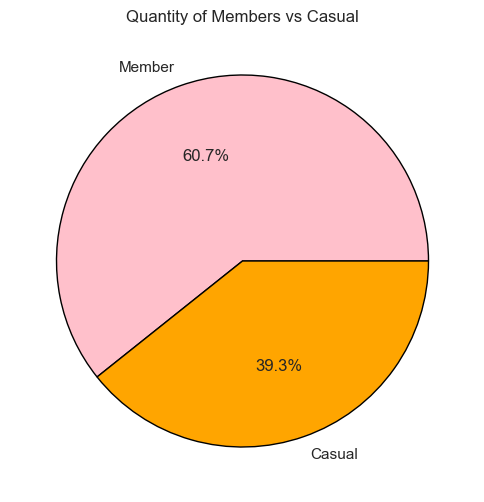

In [86]:
import matplotlib.pyplot as plt

# Counting 'member' and 'casual' from the 'member_casual' column
member_count = full_data[full_data['member_casual'] == 'member'].shape[0]
casual_count = full_data[full_data['member_casual'] == 'casual'].shape[0]

# Preparing the pie chart
sizes = [member_count, casual_count]
labels = ['Member', 'Casual']
colors = ["pink", "orange"]

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.title("Quantity of Members vs Casual")
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.show()

In [88]:
full_data = full_data.dropna()

In [89]:
year_2021 = full_data[full_data['year'] == 2021]

In [90]:
year_2022 = full_data[full_data['year'] == 2022]


In [91]:
year_2023 = full_data[full_data['year'] == 2023]

In [ ]:
year_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3253406 entries, 2749881 to 6226661
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  time_of_day            object        
 14  day_of_week            category      
 15  ride_duration_minutes  float64       
 16  year                   int32         
dtypes: category(1), datetime64[ns](2), float64(5), int32(1), object(

In [ ]:
year_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454503 entries, 0 to 2749880
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  time_of_day            object        
 14  day_of_week            category      
 15  ride_duration_minutes  float64       
 16  year                   int32         
dtypes: category(1), datetime64[ns](2), float64(5), int32(1), object(8)
mem

In [92]:
year_2021_sampled = year_2021.sample(n=2454503, random_state=42)

year_2021_sampled.head()

ride_id rideable_type          started_at  \
2017288  8FB4217436646BF2  classic_bike 2021-10-03 10:30:32   
50348    E6E113129EA53D3F  classic_bike 2021-01-16 11:22:42   
1281848  D751C5F069ACA971  classic_bike 2021-07-19 08:42:56   
1346215  E56F2DF851475DC5  classic_bike 2021-07-25 14:46:22   
703242   02A43977CAE2466F  classic_bike 2021-05-18 06:04:34   

                   ended_at               start_station_name start_station_id  \
2017288 2021-10-03 10:54:46                    1st & M St NE          31603.0   
50348   2021-01-16 11:28:12                    4th & M St SW          31108.0   
1281848 2021-07-19 08:49:04                   13th & D St NE          31622.0   
1346215 2021-07-25 14:52:51       M St & Pennsylvania Ave NW          31246.0   
703242  2021-05-18 06:08:58  39th & Calvert St NW / Stoddert          31306.0   

                        end_station_name end_station_id  start_lat  start_lng  \
2017288                   14th & R St NW        31202.0  38.905697 -77.005483   
50348     L'Enfant Plaza / 7th & C St SW        31218.0  38.876697 -77.017898   
1281848  Columbus Circle / Union Station        31623.0  38.894832 -76.987633   
1346215                   20th & L St NW        31250.0  38.905126 -77.056887   
703242         Reservoir Rd & 38th St NW        31325.0  38.922649 -77.077271   

           end_lat    end_lng member_casual    time_of_day day_of_week  \
2017288  38.913046 -77.032008        member   late morning      Sunday   
50348    38.886266 -77.022241        member   late morning    Saturday   
1281848  38.896960 -77.004930        member   late morning      Monday   
1346215  38.903584 -77.044789        member      afternoon      Sunday   
703242   38.912614 -77.074323        member  early morning     Tuesday   

         ride_duration_minutes  year  
2017288              24.233333  2021  
50348                 5.500000  2021  
1281848               6.133333  2021  
1346215               6.483333  2021  
703242                4.400000  2021

In [93]:
year_2022_sampled = year_2022.sample(n=3253406, random_state=42)

year_2022_sampled.head()

ride_id rideable_type          started_at  \
4986027  1E9E52FE0958F0E2  classic_bike 2022-08-24 23:57:37   
5815782  3E426814DC0805E7  classic_bike 2022-11-03 08:09:26   
3877943  02F5DA1E0E8305ED  classic_bike 2022-05-29 13:00:15   
5083083  9F687F4B9FF11AAE  classic_bike 2022-09-01 19:49:10   
3045489  EC1A851DAC9F98F2  classic_bike 2022-03-05 13:00:33   

                   ended_at             start_station_name start_station_id  \
4986027 2022-08-25 00:20:39                 22nd & P ST NW          31285.0   
5815782 2022-11-03 08:29:04                 16th & R St NW          31282.0   
3877943 2022-05-29 13:04:57          USDA / 12th & C St SW          31217.0   
5083083 2022-09-01 19:54:39   Columbia Rd & Georgia Ave NW          31115.0   
3045489 2022-03-05 14:17:12  22nd St & Constitution Ave NW          31292.0   

                  end_station_name end_station_id  start_lat  start_lng  \
4986027  Jefferson Dr & 14th St SW        31247.0  38.909394 -77.048728   
5815782              6th & H St NE        31615.0  38.912652 -77.036278   
3877943      USDA / 12th & C St SW        31217.0  38.886277 -77.028242   
5083083             11th & V st NW        31332.0  38.928121 -77.023795   
3045489         Jefferson Memorial        31249.0  38.892441 -77.048947   

           end_lat    end_lng member_casual    time_of_day day_of_week  \
4986027  38.888553 -77.032427        casual  early morning    Thursday   
5815782  38.899972 -76.998347        member   late morning    Thursday   
3877943  38.886277 -77.028242        casual      afternoon      Sunday   
5083083  38.918199 -77.027171        member          night    Thursday   
3045489  38.879819 -77.037413        casual      afternoon    Saturday   

         ride_duration_minutes  year  
4986027              23.033333  2022  
5815782              19.633333  2022  
3877943               4.700000  2022  
5083083               5.483333  2022  
3045489              76.650000  2022

In [ ]:
year_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3864783 entries, 6226664 to 10693995
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  time_of_day            object        
 14  day_of_week            category      
 15  ride_duration_minutes  float64       
 16  year                   int32         
dtypes: category(1), datetime64[ns](2), float64(5), int32(1), object

In [94]:
year_2023_sampled = year_2023.sample(n=3864783, random_state=42)

year_2023_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3864783 entries, 6922473 to 8710170
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  time_of_day            object        
 14  day_of_week            category      
 15  ride_duration_minutes  float64       
 16  year                   int32         
dtypes: category(1), datetime64[ns](2), float64(5), int32(1), object(

In [102]:
import geopandas as gpd
import pandas as pd

# Step 1: Load the shapefile for neighborhoods
gdf_neighborhoods = gpd.read_file(
    '/Users/enzowurtele/Desktop/Capital_BikeShare_Analysis/Wards_from_2022/Wards_from_2022.shp'
)

# Simplify the neighborhood shapes (reduce complexity)
gdf_neighborhoods['geometry'] = gdf_neighborhoods['geometry'].simplify(0.001)

# Step 2: Select only necessary columns in the neighborhoods shapefile
gdf_neighborhoods = gdf_neighborhoods[['NAME', 'geometry']]  # Replace 'NAME' with relevant column

# Step 3: Load and preprocess bike station data
gdf_bike_stations = gpd.GeoDataFrame(
    year_2023_sampled,  # Replace with the dataset you're using
    geometry=gpd.points_from_xy(year_2023_sampled['start_lng'], year_2023_sampled['start_lat']),
    crs="EPSG:4326"
)

gdf_bike_stations = gdf_bike_stations.to_crs(gdf_neighborhoods.crs)

# 4. Spatial join: Determine which district or neighborhood each bike station is in
year_2023_wards = gpd.sjoin(gdf_bike_stations, gdf_neighborhoods, how="left", predicate="within")

# View the results
print(year_2023_wards.head())

                  ride_id rideable_type          started_at  \
6922473  171F990188FA9BB3  classic_bike 2023-03-31 15:21:47   
8725350  C2EF45E43B6C38DA  classic_bike 2023-08-05 22:53:09   
7146789  85475EE4099E3A45  classic_bike 2023-04-16 22:15:23   
9710523  EADA729B90FD1D17  classic_bike 2023-10-10 07:37:17   
6410549  DBCDAF3AA397C582  classic_bike 2023-01-28 16:21:06   

                   ended_at                           start_station_name  \
6922473 2023-03-31 16:00:38         Washington & Independence Ave SW/HHS   
8725350 2023-08-05 22:58:31                          15th & Euclid St NW   
7146789 2023-04-16 23:38:04  Henry Bacon Dr & Lincoln Memorial Circle NW   
9710523 2023-10-10 07:48:36                               11th & S St NW   
6410549 2023-01-28 17:00:30            Rhode Island & Connecticut Ave NW   

        start_station_id                             end_station_name  \
6922473          31272.0                 9th St & Pennsylvania Ave NW   
8725350          3

In [98]:
import geopandas as gpd
import pandas as pd

# Step 1: Load the shapefile for neighborhoods
gdf_neighborhoods = gpd.read_file(
    '/Users/enzowurtele/Desktop/Capital_BikeShare_Analysis/Wards_from_2022/Wards_from_2022.shp'
)

# Simplify the neighborhood shapes (reduce complexity)
gdf_neighborhoods['geometry'] = gdf_neighborhoods['geometry'].simplify(0.001)

# Step 2: Select only necessary columns in the neighborhoods shapefile
gdf_neighborhoods = gdf_neighborhoods[['NAME', 'geometry']]  # Replace 'NAME' with relevant column

# Step 3: Load and preprocess bike station data
gdf_bike_stations = gpd.GeoDataFrame(
    year_2022_sampled,  # Replace with the dataset you're using
    geometry=gpd.points_from_xy(year_2022_sampled['start_lng'], year_2022_sampled['start_lat']),
    crs="EPSG:4326"
)

gdf_bike_stations = gdf_bike_stations.to_crs(gdf_neighborhoods.crs)

# 4. Spatial join: Determine which district or neighborhood each bike station is in
year_2022_wards = gpd.sjoin(gdf_bike_stations, gdf_neighborhoods, how="left", predicate="within")

# View the results
print(year_2022_wards.head())


                  ride_id rideable_type          started_at  \
4986027  1E9E52FE0958F0E2  classic_bike 2022-08-24 23:57:37   
5815782  3E426814DC0805E7  classic_bike 2022-11-03 08:09:26   
3877943  02F5DA1E0E8305ED  classic_bike 2022-05-29 13:00:15   
5083083  9F687F4B9FF11AAE  classic_bike 2022-09-01 19:49:10   
3045489  EC1A851DAC9F98F2  classic_bike 2022-03-05 13:00:33   

                   ended_at             start_station_name start_station_id  \
4986027 2022-08-25 00:20:39                 22nd & P ST NW          31285.0   
5815782 2022-11-03 08:29:04                 16th & R St NW          31282.0   
3877943 2022-05-29 13:04:57          USDA / 12th & C St SW          31217.0   
5083083 2022-09-01 19:54:39   Columbia Rd & Georgia Ave NW          31115.0   
3045489 2022-03-05 14:17:12  22nd St & Constitution Ave NW          31292.0   

                  end_station_name end_station_id  start_lat  start_lng  \
4986027  Jefferson Dr & 14th St SW        31247.0  38.909394 -77.048728

In [95]:
import geopandas as gpd
import pandas as pd

# 1. Load the shapefile for Washington DC neighborhoods
# Replace the file path with the actual path to your shapefile
gdf_neighborhoods = gpd.read_file('/Users/enzowurtele/Desktop/Capital_BikeShare_Analysis/Wards_from_2022/Wards_from_2022.shp')

# 2. Load bike station data into a GeoDataFrame
# Assuming `unique_stations` is a DataFrame containing `start_lat` and `start_lng`
gdf_bike_stations = gpd.GeoDataFrame(
    year_2021_sampled,
    geometry=gpd.points_from_xy(year_2021_sampled['start_lng'], year_2021_sampled['start_lat']),
    crs="EPSG:4326"  # WGS 84 CRS for latitude/longitude
)

# 3. Ensure both GeoDataFrames have the same CRS
# Reprojecting bike stations if needed to match neighborhoods CRS
gdf_bike_stations = gdf_bike_stations.to_crs(gdf_neighborhoods.crs)

# 4. Spatial join: Determine which district or neighborhood each bike station is in
year_2021_wards = gpd.sjoin(gdf_bike_stations, gdf_neighborhoods, how="left", predicate="within")

# 5. View the results
print(year_2021_wards.head())

                  ride_id rideable_type          started_at  \
2017288  8FB4217436646BF2  classic_bike 2021-10-03 10:30:32   
50348    E6E113129EA53D3F  classic_bike 2021-01-16 11:22:42   
1281848  D751C5F069ACA971  classic_bike 2021-07-19 08:42:56   
1346215  E56F2DF851475DC5  classic_bike 2021-07-25 14:46:22   
703242   02A43977CAE2466F  classic_bike 2021-05-18 06:04:34   

                   ended_at               start_station_name start_station_id  \
2017288 2021-10-03 10:54:46                    1st & M St NE          31603.0   
50348   2021-01-16 11:28:12                    4th & M St SW          31108.0   
1281848 2021-07-19 08:49:04                   13th & D St NE          31622.0   
1346215 2021-07-25 14:52:51       M St & Pennsylvania Ave NW          31246.0   
703242  2021-05-18 06:08:58  39th & Calvert St NW / Stoddert          31306.0   

                        end_station_name end_station_id  start_lat  start_lng  \
2017288                   14th & R St NW        31202

<Axes: xlabel='rideable_type', ylabel='count'>

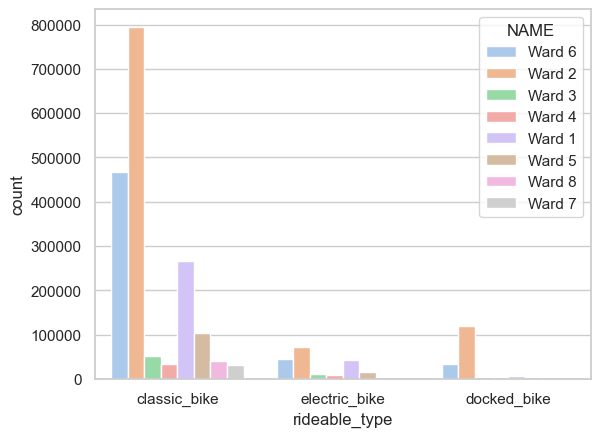

In [96]:
sns.countplot(data=year_2021_wards, x='rideable_type', hue='NAME')

In [101]:
ward_1_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 1']

In [ ]:
ward_2_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 2']

In [ ]:
ward_2_2022 = year_2022_wards[year_2022_wards['NAME'] == 'Ward 2']

In [ ]:
ward_2_2023 = year_2023_wards[year_2023_wards['NAME'] == 'Ward 2']

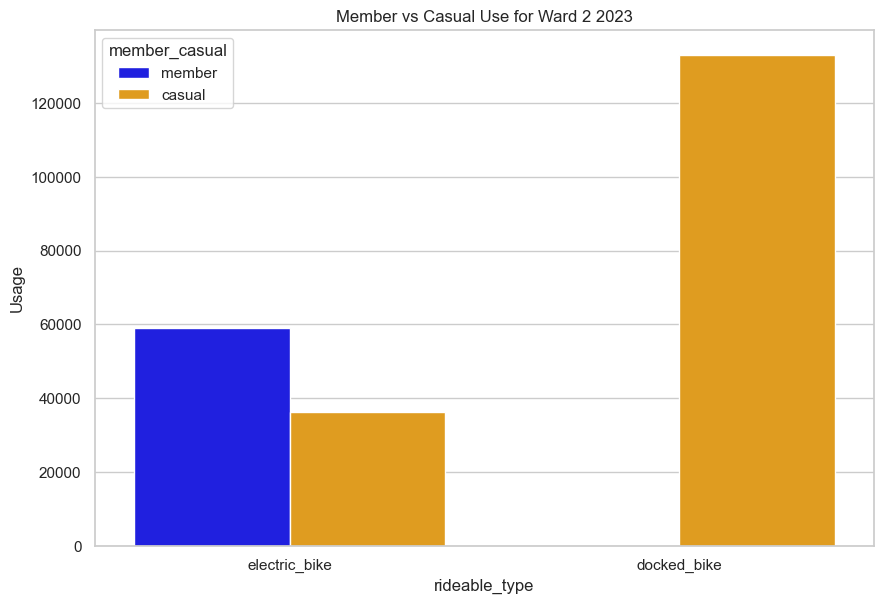

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_data' is your DataFrame
rideable_type_order = ['electric_bike', 'docked_bike']  # Ensure 'classic_bike' is excluded
member_casual_order = ['member', 'casual']

# Define a consistent color palette
palette = {'member': 'blue', 'casual': 'orange'}

filtered_data = ward_2_2022[ward_2_2022['rideable_type'] != 'classic_bike']

plt.figure(figsize=(9,6))
ax = sns.countplot(
    data=filtered_data,
    x='rideable_type',
    hue='member_casual',
    order=rideable_type_order,
    hue_order=member_casual_order,
    palette=palette
)
plt.tight_layout()
plt.ylabel('Usage')
plt.title('Member vs Casual Use for Ward 2 2023')
plt.show()





In [ ]:
total_counts = filtered_data.groupby('rideable_type').size()

In [ ]:
total_counts

rideable_type
docked_bike      133149
electric_bike     95274
dtype: int64

: 

<Axes: xlabel='rideable_type', ylabel='count'>

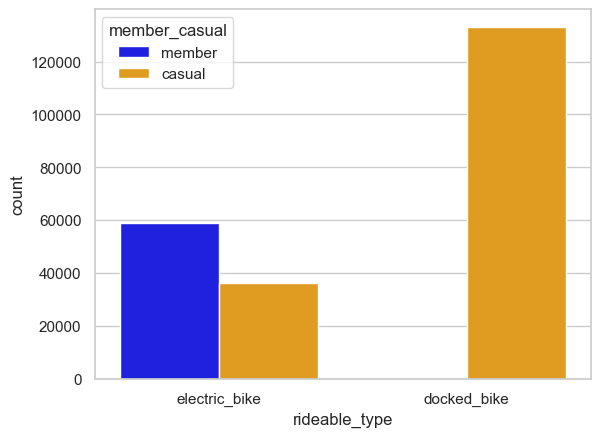

In [ ]:
rideable_type_order = ['electric_bike', 'docked_bike']  # Ensure 'classic_bike' is excluded
member_casual_order = ['member', 'casual']

# Define a consistent color palette
palette = {'member': 'blue', 'casual': 'orange'}

filtered_data = ward_2_2022[ward_2_2022['rideable_type'] != 'classic_bike']

# Create the countplot
sns.countplot(
    data=filtered_data,
    x='rideable_type',
    hue='member_casual',
    order=rideable_type_order,       # Set consistent x-axis order
    hue_order=member_casual_order,  # Set consistent hue order
    palette=palette      )

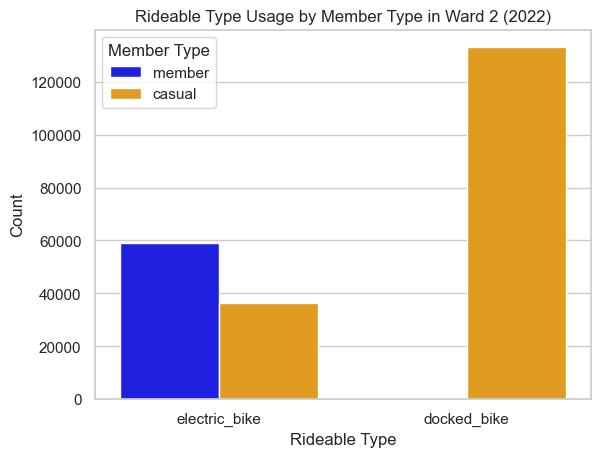

In [ ]:
# Filter the data for Ward 2 and exclude 'classic_bike'
ward_2_2022 = year_2022_wards[year_2022_wards['NAME'] == 'Ward 2']
filtered_data = ward_2_2022[ward_2_2022['rideable_type'] != 'classic_bike']

# Define consistent orders and palette
rideable_type_order = ['electric_bike', 'docked_bike']  # Adjust as necessary
member_casual_order = ['member', 'casual']  # Ensure consistent hue order
palette = {
    'member': 'blue',
    'casual': 'orange'
}  # Colors for member and casual

# Create the countplot
sns.countplot(
    data=filtered_data,
    x='rideable_type',
    hue='member_casual',
    order=rideable_type_order,       # Set consistent x-axis order
    hue_order=member_casual_order,  # Set consistent hue order
    palette=palette                  # Use predefined palette for hues
)

# Add labels and title
plt.title("Rideable Type Usage by Member Type in Ward 2 (2022)")
plt.xlabel("Rideable Type")
plt.ylabel("Count")
plt.legend(title="Member Type")  # Update legend title if needed

# Show the plot
plt.show()


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_7761/868633609.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


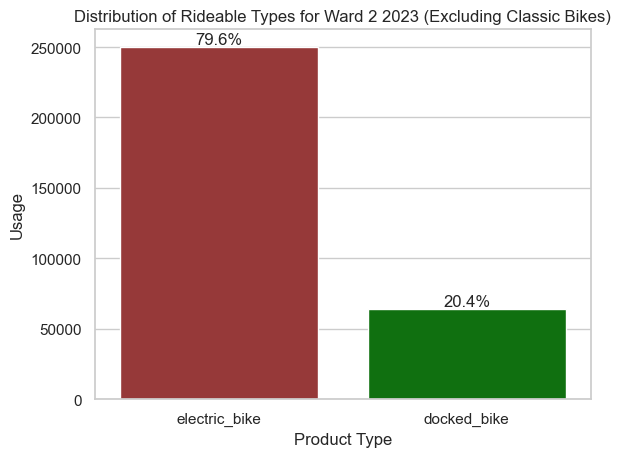

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to exclude 'classic_bike'
filtered_data = ward_2_2023[ward_2_2023['rideable_type'] != 'classic_bike']

# Define the order of rideable types and a consistent palette
rideable_type_order = ['electric_bike', 'docked_bike']  # Adjust this list based on your data
palette = {'electric_bike': 'brown', 'docked_bike': 'green'}  # Consistent colors

# Create the countplot
ax = sns.countplot(
    data=filtered_data,
    x='rideable_type',               # x-axis as rideable_type
    order=rideable_type_order,       # Ensure consistent order of rideable types
    palette=palette                  # Use predefined color palette
)

# Add labels and title for better visualization
plt.title("Distribution of Rideable Types for Ward 2 2023 (Excluding Classic Bikes)")
plt.xlabel("Product Type")
plt.ylabel("Usage")

# Calculate the percentages and add them on top of each bar
total = len(filtered_data)  # Total number of entries in the filtered data
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{percentage:.1f}%',  # Position the text
            ha='center', va='bottom', fontsize=12)  # Positioning the text

# Show the plot
plt.show()




<Axes: xlabel='rideable_type', ylabel='count'>

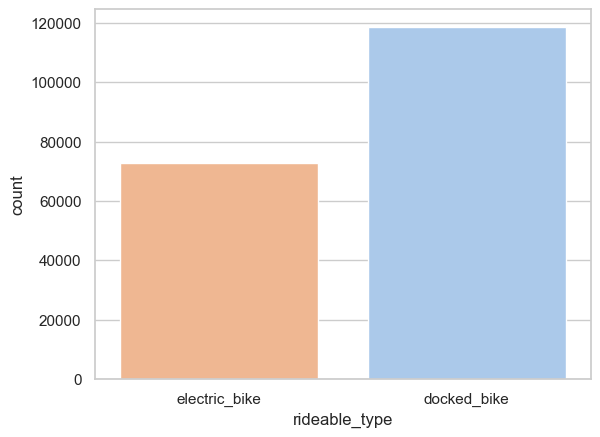

In [ ]:
filtered_data_1 = ward_2_2021[ward_2_2021['rideable_type'] != 'classic_bike']

sns.countplot(
    data=filtered_data_1,
    x='rideable_type',               # x-axis as rideable_type
    hue='rideable_type',             # Use hue for different rideable types
    order=rideable_type_order,  
     )     # Ensure consistent order of rideable types
   

<Axes: xlabel='rideable_type', ylabel='count'>

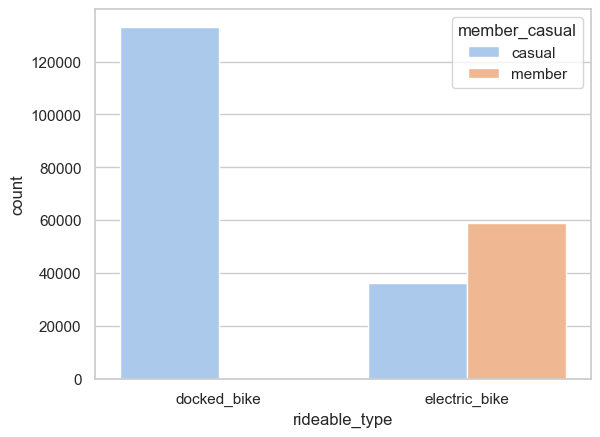

In [ ]:
ward_2_2022 = year_2022_wards[year_2022_wards['NAME'] == 'Ward 2']

sns.countplot(
    data=ward_2_2022[ward_2_2022['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='member_casual'
)

<Axes: xlabel='rideable_type', ylabel='count'>

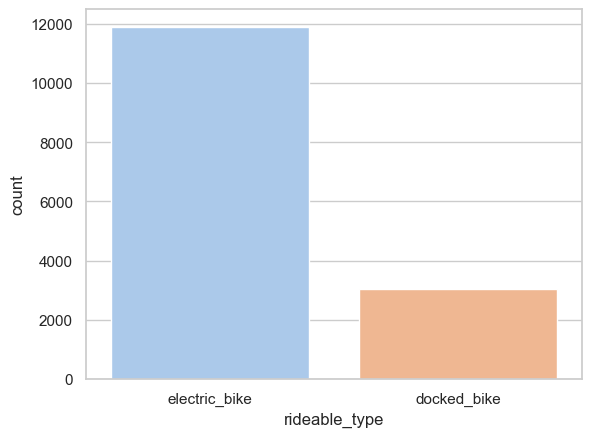

In [ ]:
ward_3_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 3']

sns.countplot(
    data=ward_3_2021[ward_3_2021['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='rideable_type'
)

<Axes: xlabel='rideable_type', ylabel='count'>

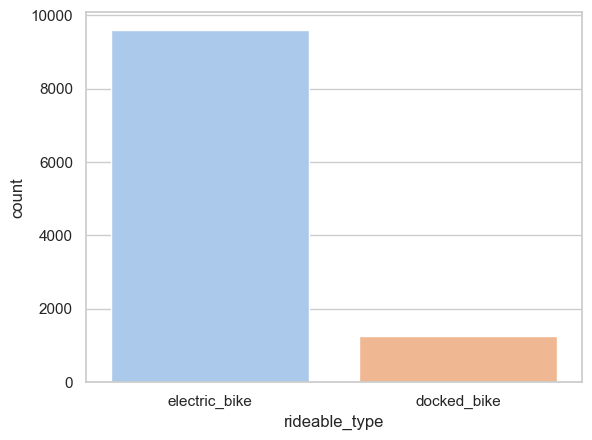

In [ ]:
ward_4_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 4']

sns.countplot(
    data=ward_4_2021[ward_4_2021['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='rideable_type'
)

<Axes: xlabel='rideable_type', ylabel='count'>

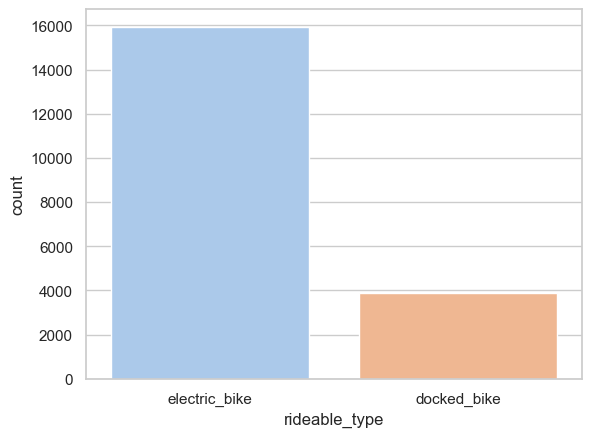

In [ ]:
ward_5_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 5']

sns.countplot(
    data=ward_5_2021[ward_5_2021['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='rideable_type'
)

<Axes: xlabel='rideable_type', ylabel='count'>

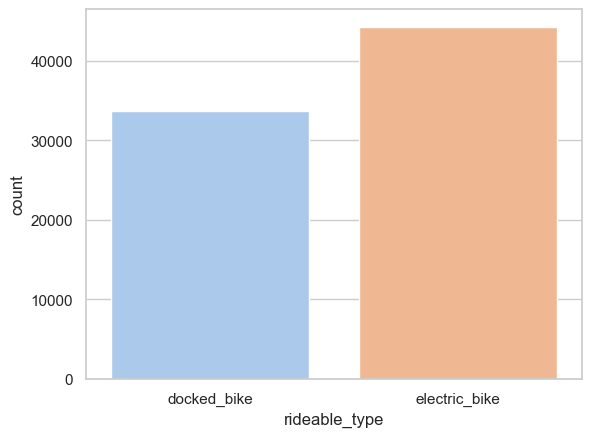

In [ ]:
ward_6_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 6']

sns.countplot(
    data=ward_6_2021[ward_6_2021['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='rideable_type'
)

<Axes: xlabel='rideable_type', ylabel='count'>

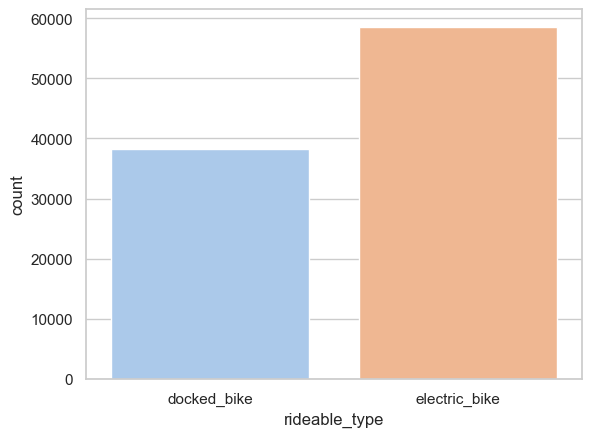

In [ ]:
ward_2_2022 = year_2022_wards[year_2022_wards['NAME'] == 'Ward 6']

sns.countplot(
    data=ward_2_2022[ward_2_2022['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='rideable_type'
)

<Axes: xlabel='rideable_type', ylabel='count'>

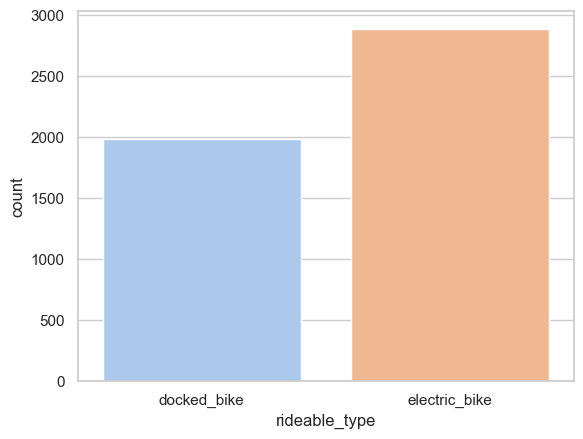

In [ ]:
ward_7_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 7']

sns.countplot(
    data=ward_7_2021[ward_7_2021['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='rideable_type'
)

<Axes: xlabel='rideable_type', ylabel='count'>

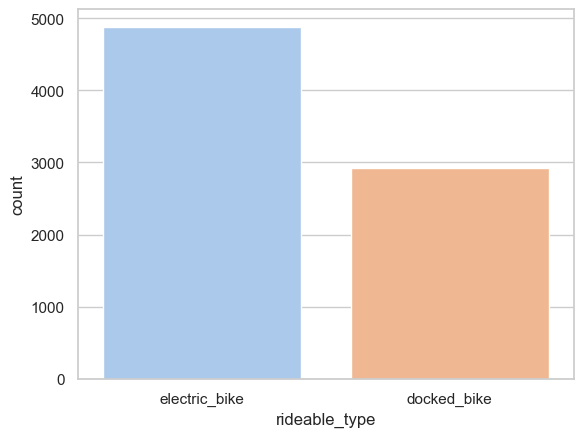

In [ ]:
ward_8_2021 = year_2021_wards[year_2021_wards['NAME'] == 'Ward 8']

sns.countplot(
    data=ward_8_2021[ward_8_2021['rideable_type'] != 'classic_bike'],  
    x='rideable_type', hue='rideable_type'
)

In [ ]:
start_station_counts = full_data['start_station_name'].value_counts()

print(start_station_counts.head(50))

start_station_name
New Hampshire Ave & T St NW                              102179
Columbus Circle / Union Station                          100584
Lincoln Memorial                                          96667
15th & P St NW                                            95670
Jefferson Dr & 14th St SW                                 88078
1st & M St NE                                             85552
4th St & Madison Dr NW                                    83831
5th & K St NW                                             76586
Smithsonian-National Mall / Jefferson Dr & 12th St SW     76452
Henry Bacon Dr & Lincoln Memorial Circle NW               76236
14th & V St NW                                            75868
Eastern Market Metro / Pennsylvania Ave & 8th St SE       75397
Massachusetts Ave & Dupont Circle NW                      72609
8th & O St NW                                             68040
14th & R St NW                                            67332
11th & M St NW       

In [ ]:
top_stations = [
    "New Hampshire Ave & T St NW",
    "Columbus Circle / Union Station",
    "Lincoln Memorial",
    "15th & P St NW",
    "Jefferson Dr & 14th St SW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW",
    "Henry Bacon Dr & Lincoln Memorial Circle NW",
    "14th & V St NW",
    "Eastern Market Metro / Pennsylvania Ave & 8th St SE",
    "Massachusetts Ave & Dupont Circle NW",
    "8th & O St NW",
    "14th & R St NW",
    "11th & M St NW",
    "17th & Corcoran St NW",
    "15th & W St NW",
    "Thomas Circle",
    "6th & H St NE"
]

top_dense_stations = full_data[full_data['start_station_name'].isin(top_stations)]

unique_dense_stations = top_dense_stations.groupby('start_station_name').first()

In [ ]:
station_list = full_data['start_station_name'].unique()

check_list = full_data[full_data['start_station_name'].isin(station_list)]

unique_stations = check_list.groupby('start_station_name').first()

In [ ]:
import geopandas as gpd
import pandas as pd

# 1. Load the shapefile for Washington DC neighborhoods
# Replace the file path with the actual path to your shapefile
gdf_neighborhoods = gpd.read_file('/Users/enzowurtele/Desktop/data-science/bike_project/Wards_from_2022/Wards_from_2022.shp')

# 2. Load bike station data into a GeoDataFrame
# Assuming `unique_stations` is a DataFrame containing `start_lat` and `start_lng`
gdf_bike_stations = gpd.GeoDataFrame(
    unique_stations,
    geometry=gpd.points_from_xy(unique_stations['start_lng'], unique_stations['start_lat']),
    crs="EPSG:4326"  # WGS 84 CRS for latitude/longitude
)

# 3. Ensure both GeoDataFrames have the same CRS
# Reprojecting bike stations if needed to match neighborhoods CRS
gdf_bike_stations = gdf_bike_stations.to_crs(gdf_neighborhoods.crs)

# 4. Spatial join: Determine which district or neighborhood each bike station is in
stations_with_neighborhoods = gpd.sjoin(gdf_bike_stations, gdf_neighborhoods, how="left", predicate="within")

# 5. View the results
print(stations_with_neighborhoods.head())



                                ride_id rideable_type          started_at  \
start_station_name                                                          
10th & E St NW         A958943AC3F57F3E  classic_bike 2021-01-01 14:37:29   
10th & Florida Ave NW  A211FE8F23EDB8AB  classic_bike 2021-01-01 00:47:51   
10th & G St NW         FFD46EF1EC21CACF  classic_bike 2021-01-01 09:25:59   
10th & H St NE         5D255AA40AC3D2B7  classic_bike 2021-11-30 15:48:31   
10th & K St NW         BCD4E1317B107680   docked_bike 2021-01-01 11:00:13   

                                 ended_at start_station_id  \
start_station_name                                           
10th & E St NW        2021-01-01 14:45:07          31256.0   
10th & Florida Ave NW 2021-01-01 01:00:14          31120.0   
10th & G St NW        2021-01-01 10:24:22          31274.0   
10th & H St NE        2021-11-30 16:17:02          31672.0   
10th & K St NW        2021-01-01 13:16:16          31263.0   

                         

In [ ]:
stations_with_neighborhoods.head()

ride_id rideable_type          started_at  \
start_station_name                                                          
10th & E St NW         A958943AC3F57F3E  classic_bike 2021-01-01 14:37:29   
10th & Florida Ave NW  A211FE8F23EDB8AB  classic_bike 2021-01-01 00:47:51   
10th & G St NW         FFD46EF1EC21CACF  classic_bike 2021-01-01 09:25:59   
10th & H St NE         5D255AA40AC3D2B7  classic_bike 2021-11-30 15:48:31   
10th & K St NW         BCD4E1317B107680   docked_bike 2021-01-01 11:00:13   

                                 ended_at start_station_id  \
start_station_name                                           
10th & E St NW        2021-01-01 14:45:07          31256.0   
10th & Florida Ave NW 2021-01-01 01:00:14          31120.0   
10th & G St NW        2021-01-01 10:24:22          31274.0   
10th & H St NE        2021-11-30 16:17:02          31672.0   
10th & K St NW        2021-01-01 13:16:16          31263.0   

                                    end_station_name end_station_id  \
start_station_name                                                    
10th & E St NW                        14th & L St NW        31283.0   
10th & Florida Ave NW                  3rd & M St NE        31627.0   
10th & G St NW                         8th & H St NW        31228.0   
10th & H St NE         Potomac & Pennsylvania Ave SE        31606.0   
10th & K St NW                        10th & K St NW        31263.0   

                       start_lat  start_lng    end_lat  ...  P0050009  \
start_station_name                                      ...             
10th & E St NW         38.895914 -77.026064  38.903658  ...       0.0   
10th & Florida Ave NW  38.920387 -77.025672  38.905470  ...       0.0   
10th & G St NW         38.898243 -77.026235  38.899700  ...       0.0   
10th & H St NE         38.899984 -76.992725  38.880300  ...     255.0   
10th & K St NW         38.902400 -77.026220  38.902400  ...       0.0   

                      P0050010 OBJECTID  \
start_station_name                        
10th & E St NW          1543.0      4.0   
10th & Florida Ave NW    752.0      5.0   
10th & G St NW          1543.0      4.0   
10th & H St NE           887.0      2.0   
10th & K St NW          1543.0      4.0   

                                                     GLOBALID  CREATED_US  \
start_station_name                                                          
10th & E St NW         {7F8C2A51-427C-45FC-91EB-9693656AED9C}        None   
10th & Florida Ave NW  {C3C6E2E7-E68D-49B2-970C-D60675EA7B4B}        None   
10th & G St NW         {7F8C2A51-427C-45FC-91EB-9693656AED9C}        None   
10th & H St NE         {765C4F49-9292-4BDB-AA24-39F4EE43359F}        None   
10th & K St NW         {7F8C2A51-427C-45FC-91EB-9693656AED9C}        None   

                       CREATED_DA LAST_EDITE  LAST_EDI_1  SHAPEAREA SHAPELEN  
start_station_name                                                            
10th & E St NW               None       None         NaT        0.0      0.0  
10th & Florida Ave NW        None       JLAY  2023-12-08        0.0      0.0  
10th & G St NW               None       None         NaT        0.0      0.0  
10th & H St NE               None       JLAY  2023-12-08        0.0      0.0  
10th & K St NW               None       None         NaT        0.0      0.0  

[5 rows x 343 columns]

In [ ]:
stations_with_neighborhoods = stations_with_neighborhoods.reset_index()

In [ ]:
stations_with_neighborhoods.head()

start_station_name           ride_id rideable_type          started_at  \
0         10th & E St NW  A958943AC3F57F3E  classic_bike 2021-01-01 14:37:29   
1  10th & Florida Ave NW  A211FE8F23EDB8AB  classic_bike 2021-01-01 00:47:51   
2         10th & G St NW  FFD46EF1EC21CACF  classic_bike 2021-01-01 09:25:59   
3         10th & H St NE  5D255AA40AC3D2B7  classic_bike 2021-11-30 15:48:31   
4         10th & K St NW  BCD4E1317B107680   docked_bike 2021-01-01 11:00:13   

             ended_at start_station_id               end_station_name  \
0 2021-01-01 14:45:07          31256.0                 14th & L St NW   
1 2021-01-01 01:00:14          31120.0                  3rd & M St NE   
2 2021-01-01 10:24:22          31274.0                  8th & H St NW   
3 2021-11-30 16:17:02          31672.0  Potomac & Pennsylvania Ave SE   
4 2021-01-01 13:16:16          31263.0                 10th & K St NW   

  end_station_id  start_lat  start_lng  ...  P0050009  P0050010 OBJECTID  \
0        31283.0  38.895914 -77.026064  ...       0.0    1543.0      4.0   
1        31627.0  38.920387 -77.025672  ...       0.0     752.0      5.0   
2        31228.0  38.898243 -77.026235  ...       0.0    1543.0      4.0   
3        31606.0  38.899984 -76.992725  ...     255.0     887.0      2.0   
4        31263.0  38.902400 -77.026220  ...       0.0    1543.0      4.0   

                                 GLOBALID CREATED_US  CREATED_DA  LAST_EDITE  \
0  {7F8C2A51-427C-45FC-91EB-9693656AED9C}       None        None        None   
1  {C3C6E2E7-E68D-49B2-970C-D60675EA7B4B}       None        None        JLAY   
2  {7F8C2A51-427C-45FC-91EB-9693656AED9C}       None        None        None   
3  {765C4F49-9292-4BDB-AA24-39F4EE43359F}       None        None        JLAY   
4  {7F8C2A51-427C-45FC-91EB-9693656AED9C}       None        None        None   

  LAST_EDI_1  SHAPEAREA  SHAPELEN  
0        NaT        0.0       0.0  
1 2023-12-08        0.0       0.0  
2        NaT        0.0       0.0  
3 2023-12-08        0.0       0.0  
4        NaT        0.0       0.0  

[5 rows x 344 columns]

In [ ]:
stations_with_neighborhoods.head()

start_station_name           ride_id rideable_type          started_at  \
0         10th & E St NW  A958943AC3F57F3E  classic_bike 2021-01-01 14:37:29   
1  10th & Florida Ave NW  A211FE8F23EDB8AB  classic_bike 2021-01-01 00:47:51   
2         10th & G St NW  FFD46EF1EC21CACF  classic_bike 2021-01-01 09:25:59   
3         10th & H St NE  5D255AA40AC3D2B7  classic_bike 2021-11-30 15:48:31   
4         10th & K St NW  BCD4E1317B107680   docked_bike 2021-01-01 11:00:13   

             ended_at start_station_id               end_station_name  \
0 2021-01-01 14:45:07          31256.0                 14th & L St NW   
1 2021-01-01 01:00:14          31120.0                  3rd & M St NE   
2 2021-01-01 10:24:22          31274.0                  8th & H St NW   
3 2021-11-30 16:17:02          31672.0  Potomac & Pennsylvania Ave SE   
4 2021-01-01 13:16:16          31263.0                 10th & K St NW   

  end_station_id  start_lat  start_lng  ...  P0050009  P0050010 OBJECTID  \
0        31283.0  38.895914 -77.026064  ...       0.0    1543.0      4.0   
1        31627.0  38.920387 -77.025672  ...       0.0     752.0      5.0   
2        31228.0  38.898243 -77.026235  ...       0.0    1543.0      4.0   
3        31606.0  38.899984 -76.992725  ...     255.0     887.0      2.0   
4        31263.0  38.902400 -77.026220  ...       0.0    1543.0      4.0   

                                 GLOBALID CREATED_US  CREATED_DA  LAST_EDITE  \
0  {7F8C2A51-427C-45FC-91EB-9693656AED9C}       None        None        None   
1  {C3C6E2E7-E68D-49B2-970C-D60675EA7B4B}       None        None        JLAY   
2  {7F8C2A51-427C-45FC-91EB-9693656AED9C}       None        None        None   
3  {765C4F49-9292-4BDB-AA24-39F4EE43359F}       None        None        JLAY   
4  {7F8C2A51-427C-45FC-91EB-9693656AED9C}       None        None        None   

  LAST_EDI_1  SHAPEAREA  SHAPELEN  
0        NaT        0.0       0.0  
1 2023-12-08        0.0       0.0  
2        NaT        0.0       0.0  
3 2023-12-08        0.0       0.0  
4        NaT        0.0       0.0  

[5 rows x 344 columns]

In [ ]:
from branca.colormap import linear

different = folium.Map(location=[full_data['start_lat'].mean(), full_data['start_lng'].mean()], zoom_start=12)

# Create a color scale for ride duration
colormap = linear.RdYlBu_09.scale(full_data["ride_duration_minutes"].min(), full_data["ride_duration_minutes"].max())

# Iterating over the DataFrame rows
for index, row in stations_with_neighborhoods.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=8,
        color=colormap(row['ride_duration_minutes']),
        fill=True,
        fill_color=colormap(row['ride_duration_minutes']),
        fill_opacity=0.7,
        popup=f"Start: {row['NAME']}<br>Duration: {row['ride_duration_minutes']} mins",
    ).add_to(different)

# Add the color scale to the map
colormap.add_to(different)

# Display the map
different

In [ ]:
# Check data types of the columns
print(gdf_neighborhoods.dtypes)

# Check if there are any datetime columns
datetime_columns = gdf_neighborhoods.select_dtypes(include=['datetime', 'object']).columns
print(f"Datetime columns: {datetime_columns}")


WARD                  int32
NAME                 object
REP_NAME             object
WEB_URL              object
REP_PHONE            object
                     ...   
SHAPELEN              int32
geometry           geometry
station_count_x       int64
station_count_y       int64
station_count         int64
Length: 329, dtype: object
Datetime columns: Index(['NAME', 'REP_NAME', 'WEB_URL', 'REP_PHONE', 'REP_EMAIL', 'REP_OFFICE',
       'WARD_ID', 'LABEL', 'STUSAB', 'SUMLEV', 'GEOID', 'GEOCODE', 'STATE',
       'GLOBALID', 'CREATED_US', 'CREATED_DA', 'LAST_EDITE', 'LAST_EDI_1'],
      dtype='object')


In [ ]:
# Step 1: Convert all potential datetime or object columns to string
datetime_columns = ['CREATED_US', 'CREATED_DA', 'LAST_EDITE', 'LAST_EDI_1']  # Include datetime-like columns

# Convert datetime columns to strings
for col in datetime_columns:
    gdf_neighborhoods[col] = gdf_neighborhoods[col].astype(str)

# Step 2: Verify the data types
print(gdf_neighborhoods.dtypes)

In [ ]:
import folium

# Step 1: Create a base Folium map centered on Washington, DC
dev = folium.Map(location=[38.89511, -77.03637], zoom_start=12)

# Step 2: Add the Ward boundaries onto the map
folium.GeoJson(
    gdf_neighborhoods,
    name="Wards",
    style_function=lambda feature: {
        'fillColor': 'blue' if feature['properties']['station_count'] > 0 else '#c2c2c2',
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'station_count'],
        aliases=['Ward:', 'Number of Stations:']
    ),
    popup=folium.GeoJsonPopup(
        fields=['NAME', 'station_count'],
        aliases=['Ward:', 'Number of Stations:'],
        localize=True
    )
).add_to(dev)

# Step 3: Add Station Count Labels directly on the map (for each ward)
for _, row in gdf_neighborhoods.iterrows():
    # Coordinates for the label (get the centroid or center of the ward geometry)
    centroid = row['geometry'].centroid  # Get the center of the ward polygon
    lat, lon = centroid.y, centroid.x
    
    # Create a label with the number of stations
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 14px; color: black; background-color: white; padding: 5px 10px; border-radius: 5px; border: 1px solid black; display: flex; justify-content: center; align-items: center; text-align: center; height: 30px; width: 30px;">{row["station_count"]}</div>'
        ),
        popup=f"Station Count: {row['station_count']}"  # Station count in popup when clicked
    ).add_to(dev)

# Step 4: Display the map
dev




In [ ]:
# Save the map to the current directory
dev.save("washington_dc_map.html")

# For Jupyter or Colab: provide a link to download the map
from IPython.display import FileLink
FileLink("washington_dc_map.html")


/Users/enzowurtele/Desktop/data-science/bike_project/washington_dc_map.html

     NAME  avg_ride_duration
6  Ward 7          26.611275
1  Ward 2          24.771429
4  Ward 5          20.050362
5  Ward 6          18.817749
7  Ward 8          18.461712
3  Ward 4          17.963333
2  Ward 3          14.781863
0  Ward 1          11.558519


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_1768/343641610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ride_duration_by_ward, x='NAME', y='avg_ride_duration', palette='viridis')


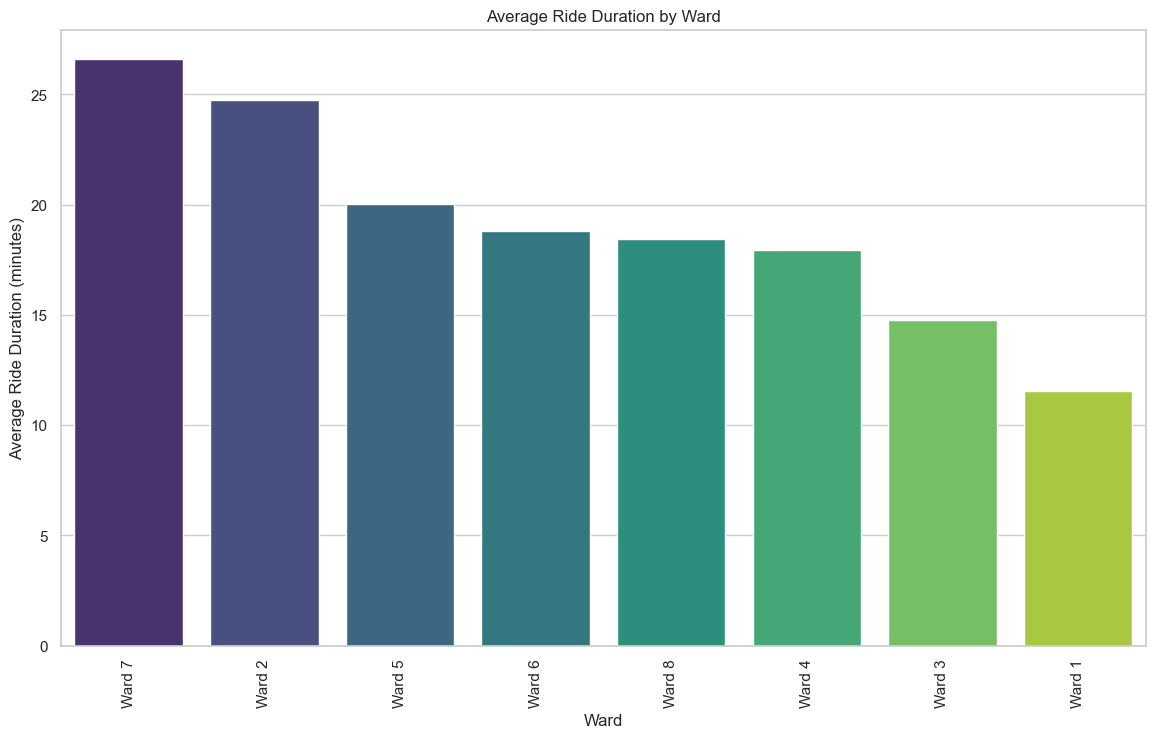

In [ ]:
# Group by ward (assuming 'NAME' is the column for wards) and calculate the mean of 'ride_duration_minutes'
avg_ride_duration_by_ward = stations_with_neighborhoods.groupby('NAME')['ride_duration_minutes'].mean().reset_index(name='avg_ride_duration')

# Sort the results for better readability (optional)
avg_ride_duration_by_ward = avg_ride_duration_by_ward.sort_values(by='avg_ride_duration', ascending=False)

# Display the result
print(avg_ride_duration_by_ward)

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_ride_duration_by_ward, x='NAME', y='avg_ride_duration', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Ride Duration by Ward')
plt.xlabel('Ward')
plt.ylabel('Average Ride Duration (minutes)')
plt.show()


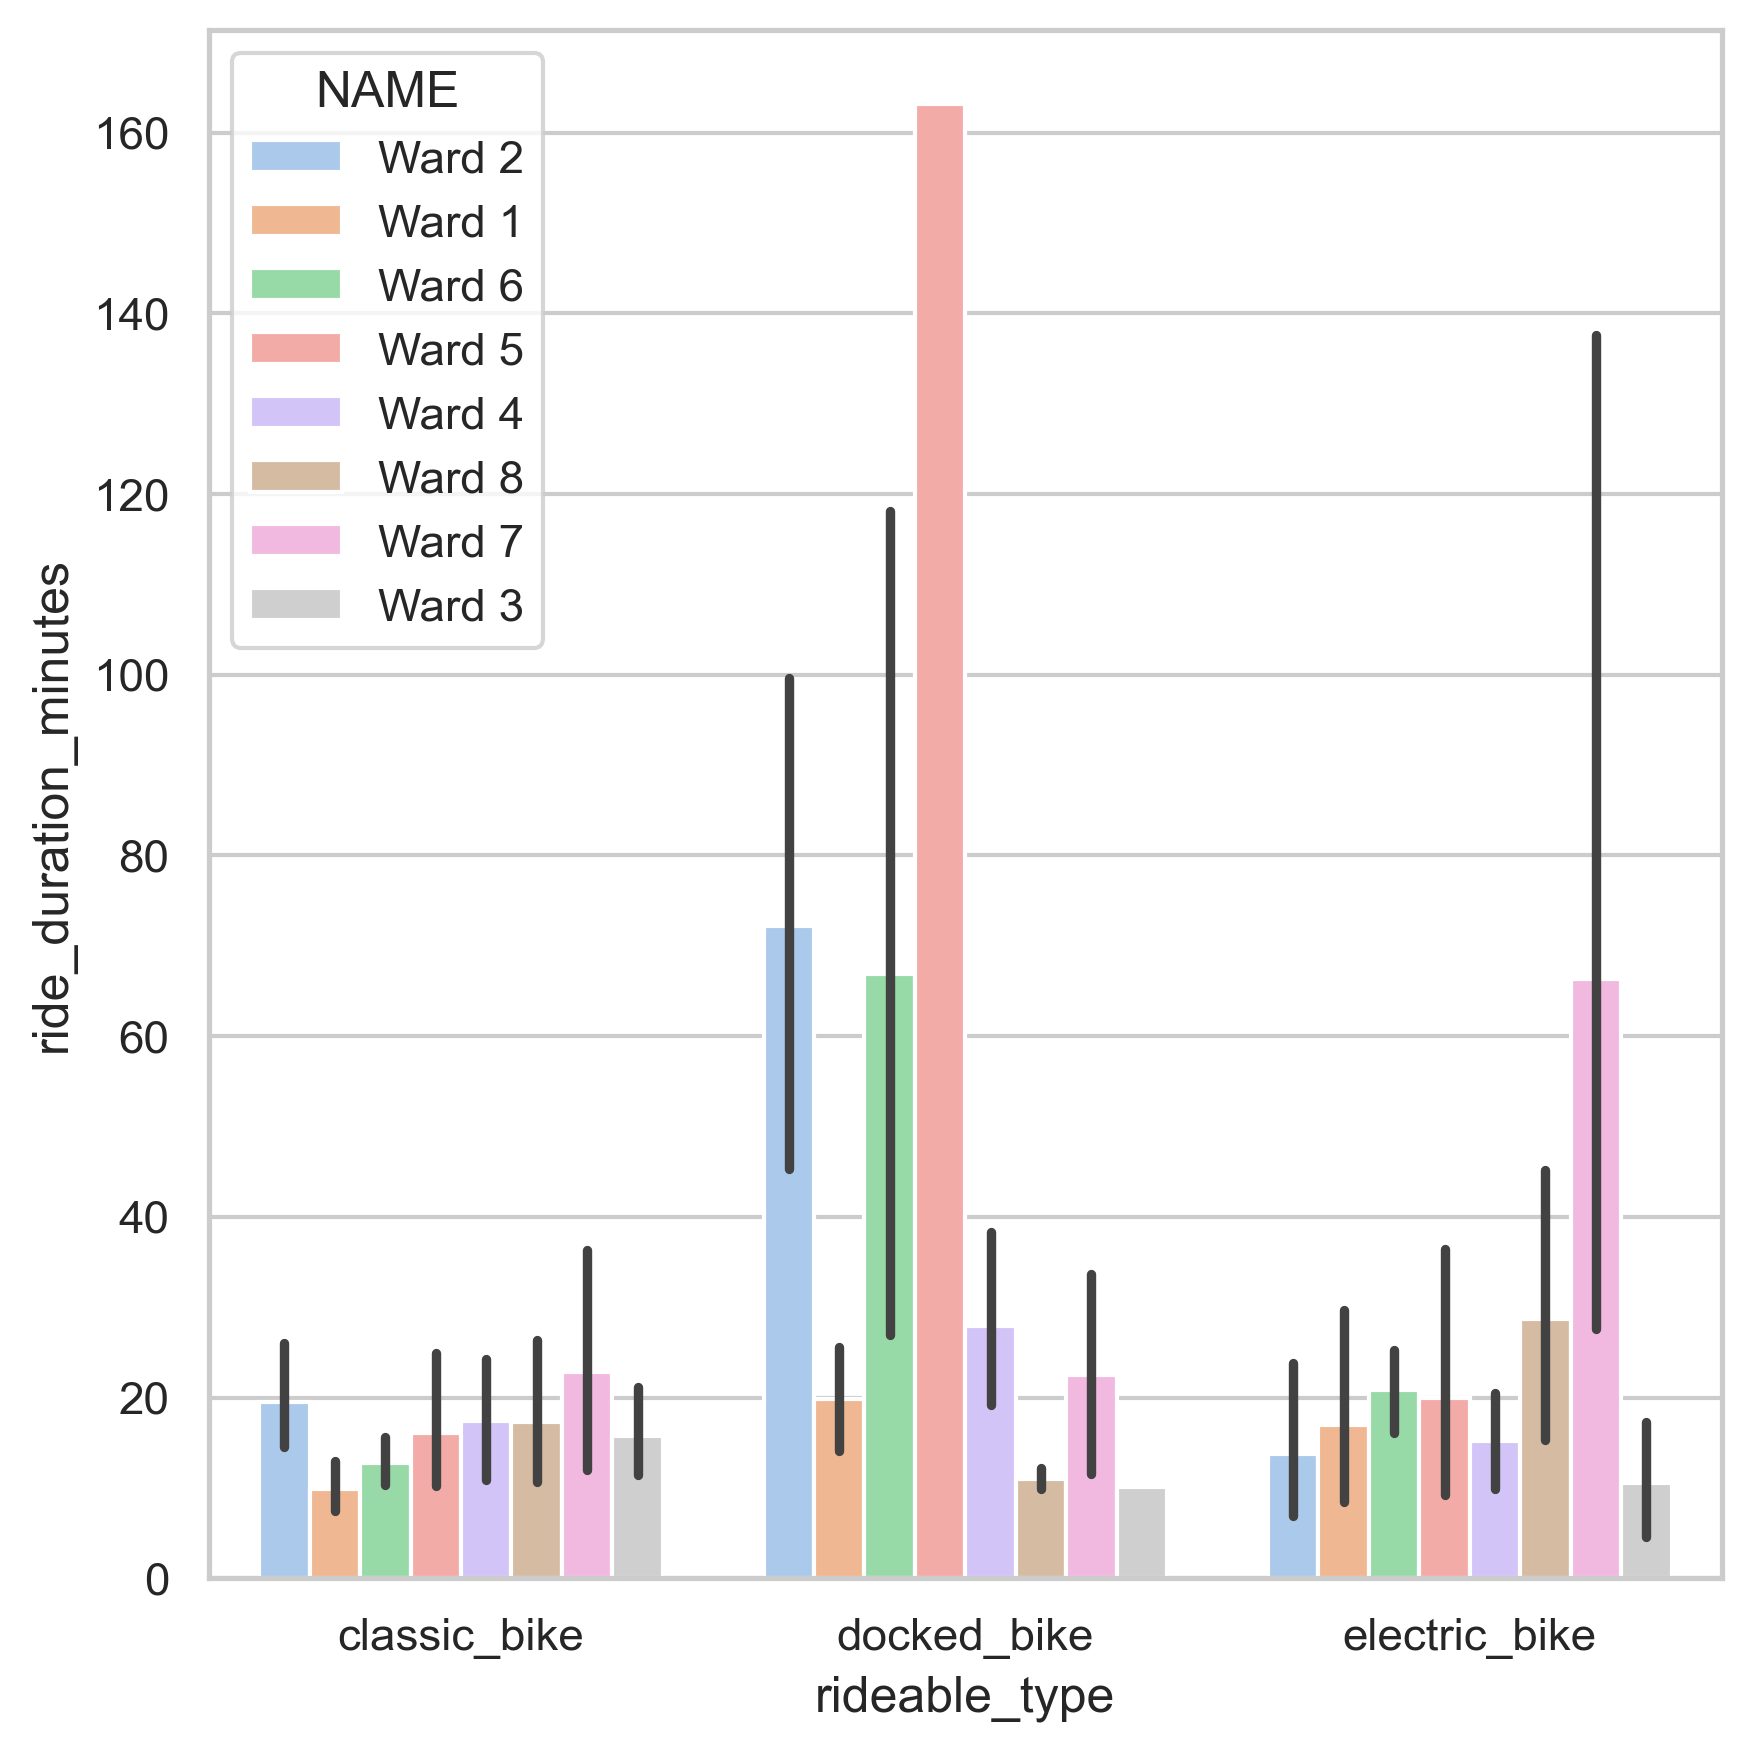

In [ ]:
plt.figure(figsize=(6,6), dpi=300)
sns.barplot(data=stations_with_neighborhoods, x='rideable_type', y='ride_duration_minutes', hue='NAME')
plt.tight_layout()

<Axes: xlabel='NAME', ylabel='count'>

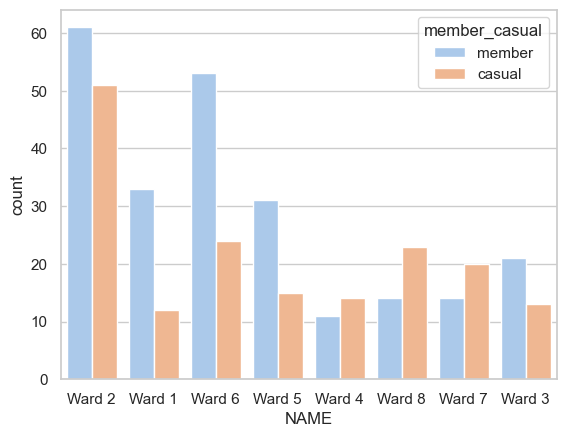

In [ ]:
sns.countplot(data=stations_with_neighborhoods, x='NAME', hue='member_casual')

In [ ]:
ward_1 = stations_with_neighborhoods[stations_with_neighborhoods['NAME'] == 'Ward 2']

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_18441/610780206.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=ridable_count_1, x='rideable_type', y='count', palette='viridis')


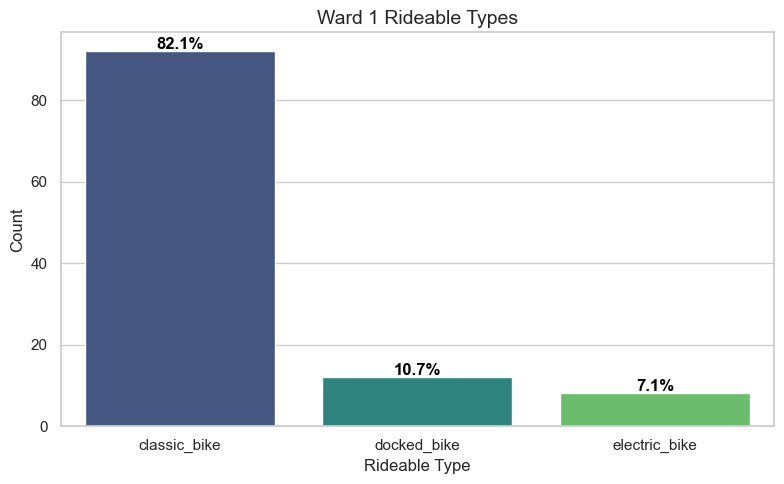

In [ ]:
ridable_count_1 = ward_1['rideable_type'].value_counts().reset_index()
ridable_count_1.columns = ['rideable_type', 'count']  # Rename columns for clarity

# Calculate the percentage for ward_1
ridable_count_1['percentage'] = (ridable_count_1['count'] / ridable_count_1['count'].sum()) * 100

# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=ridable_count_1, x='rideable_type', y='count', palette='viridis')

# Add title
plt.title('Ward 1 Rideable Types', fontsize=14)

# Add percentage labels on top of the bars
for p in ax.patches:
    percentage = f'{p.get_height() / ridable_count_1["count"].sum() * 100:.1f}%'  # Calculate and format percentage
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position text at the top of the bar
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Adjust plot appearance
plt.xlabel('Rideable Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_18441/2158045894.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=ridable_count, x='rideable_type', y='count', palette='viridis')


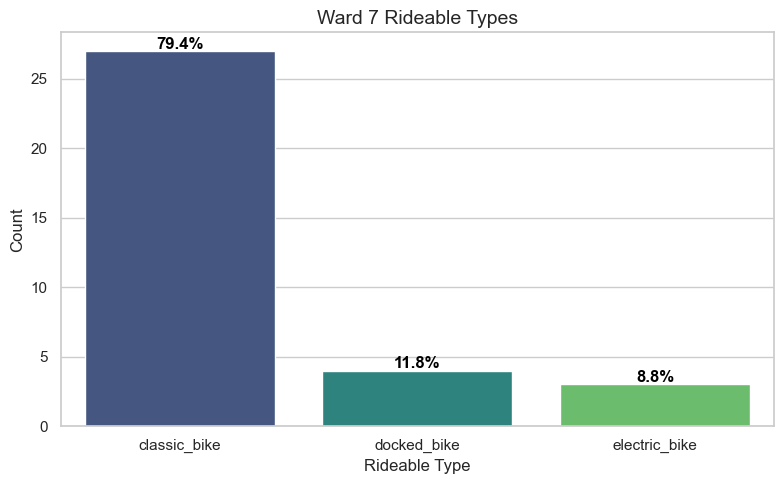

In [ ]:
ward_7 = stations_with_neighborhoods[stations_with_neighborhoods['NAME'] == 'Ward 7']

# Calculate the counts of 'rideable_type'
ridable_count = ward_7['rideable_type'].value_counts().reset_index()
ridable_count.columns = ['rideable_type', 'count']  # Rename columns for clarity

# Calculate the percentage
ridable_count['percentage'] = (ridable_count['count'] / ridable_count['count'].sum()) * 100

# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=ridable_count, x='rideable_type', y='count', palette='viridis')

# Add title
plt.title('Ward 7 Rideable Types', fontsize=14)

# Add percentage labels on top of the bars
for p in ax.patches:
    percentage = f'{p.get_height() / ridable_count["count"].sum() * 100:.1f}%'  # Calculate and format percentage
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position text at the top of the bar
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Adjust plot appearance
plt.xlabel('Rideable Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
unique_dense_stations.head(10)

ride_id  rideable_type          started_at  \
start_station_name                                                            
11th & M St NW          AF8AD3FF491BA197   classic_bike 2021-01-01 00:45:02   
14th & R St NW          D9BEA1F783DE05DF   classic_bike 2021-01-01 01:21:17   
14th & V St NW          680DF9DFBF93BC3D   classic_bike 2021-01-01 07:07:34   
15th & P St NW          E99BA98015890A80  electric_bike 2021-01-01 13:48:29   
15th & W St NW          B7BCE03432E925B1   classic_bike 2021-01-01 05:25:57   
17th & Corcoran St NW   E74069873161EE33  electric_bike 2021-01-01 00:14:32   
1st & M St NE           5B85355F6951C1E8   classic_bike 2021-01-01 00:52:46   
4th St & Madison Dr NW  AE4C158561400158   classic_bike 2021-01-01 07:50:03   
5th & K St NW           39C6E0F30E656F74   classic_bike 2021-01-01 08:40:01   
6th & H St NE           4053E619974A64EA   classic_bike 2021-01-01 11:44:43   

                                  ended_at start_station_id  \
start_station_name                                            
11th & M St NW         2021-01-01 00:55:05          31266.0   
14th & R St NW         2021-01-01 01:29:34          31202.0   
14th & V St NW         2021-01-01 07:15:37          31101.0   
15th & P St NW         2021-01-01 13:55:48          31201.0   
15th & W St NW         2021-01-01 05:34:17          31125.0   
17th & Corcoran St NW  2021-01-01 00:28:45          31214.0   
1st & M St NE          2021-01-01 01:03:54          31603.0   
4th St & Madison Dr NW 2021-01-01 09:49:28          31288.0   
5th & K St NW          2021-01-01 08:56:00          31600.0   
6th & H St NE          2021-01-01 11:50:58          31615.0   

                                       end_station_name end_station_id  \
start_station_name                                                       
11th & M St NW                     14th & Belmont St NW        31119.0   
14th & R St NW                            1st & O St NW        31519.0   
14th & V St NW           New Hampshire Ave & 24th St NW        31275.0   
15th & P St NW                            8th & O St NW        31281.0   
15th & W St NW           New Hampshire Ave & 24th St NW        31275.0   
17th & Corcoran St NW              14th & Belmont St NW        31119.0   
1st & M St NE                            11th & O St NW        31286.0   
4th St & Madison Dr NW               Jefferson Memorial        31249.0   
5th & K St NW                       11th & Girard St NW        31126.0   
6th & H St NE           Montello Ave & Holbrook Terr NE        31524.0   

                        start_lat  start_lng    end_lat    end_lng  \
start_station_name                                                   
11th & M St NW          38.905578 -77.027313  38.921074 -77.031887   
14th & R St NW          38.913046 -77.032008  38.908643 -77.012365   
14th & V St NW          38.917764 -77.032096  38.901755 -77.051084   
15th & P St NW          38.909892 -77.034337  38.908692 -77.022767   
15th & W St NW          38.919018 -77.034449  38.901755 -77.051084   
17th & Corcoran St NW   38.912138 -77.038568  38.920870 -77.031691   
1st & M St NE           38.905697 -77.005483  38.908430 -77.027140   
4th St & Madison Dr NW  38.890496 -77.017246  38.879819 -77.037413   
5th & K St NW           38.903040 -77.019027  38.925636 -77.027112   
6th & H St NE           38.899972 -76.998347  38.907444 -76.986813   

                       member_casual    time_of_day day_of_week  \
start_station_name                                                
11th & M St NW                member  early morning      Friday   
14th & R St NW                casual  early morning      Friday   
14th & V St NW                member   late morning      Friday   
15th & P St NW                member      afternoon      Friday   
15th & W St NW                member  early morning      Friday   
17th & Corcoran St NW         member  early morning      Friday   
1st & M St NE                 member  early morning      Frid

In [ ]:
top_stations = folium.Map(location=[full_data['start_lat'].mean(), full_data['start_lng'].mean()], zoom_start=12)

# Create a color scale for ride duration
colormap = linear.RdYlBu_09.scale(full_data["ride_duration_minutes"].min(), full_data["ride_duration_minutes"].max())

# Iterating over the DataFrame rows
for index, row in unique_dense_stations.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=8,
        color=colormap(row['ride_duration_minutes']),
        fill=True,
        fill_color=colormap(row['ride_duration_minutes']),
        fill_opacity=0.7,
        popup=f"Start: {row['start_station_id']}<br>Duration: {row['ride_duration_minutes']} mins",
    ).add_to(top_stations)

# Add the color scale to the map
colormap.add_to(top_stations)

# Display the map
top_stations

In [ ]:
density = folium.Map(location=[full_data['start_lat'].mean(), full_data['start_lng'].mean()], zoom_start=12)

# Create a color scale for ride duration
colormap = linear.RdYlBu_09.scale(full_data["ride_duration_minutes"].min(), full_data["ride_duration_minutes"].max())

# Iterating over the DataFrame rows
for index, row in full_data.head(1000).iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=8,
        color=colormap(row['ride_duration_minutes']),
        fill=True,
        fill_color=colormap(row['ride_duration_minutes']),
        fill_opacity=0.7,
        popup=f"Start: {row['start_station_name']}<br>Duration: {row['ride_duration_minutes']} mins",
    ).add_to(density)

# Add the color scale to the map
colormap.add_to(density)

# Display the map
density